# Import Modules & Util Functions

In [3]:
import os
import sys
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
from tqdm.notebook import tqdm
from pprint import pprint
from pytictoc import TicToc

from myutils import *
from profile import *

# Configure display options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'retina'

# Set plot style
# plt.style.use('ggplot')

# Set Parameters

In [4]:
# modeling
dirc_mets = 'dl_lost'
epochs = 2
test_mode = False
# evaluate
iter_num = 5
save_answer = True

# Generate Model ID

In [5]:
model_id = model_identity()
model_dscp = 'new_data_sync_v2'
print('Model ID:', model_id, model_dscp)

# model_name = '20240417_1333007d66_new_data_sync_v2'
# model_id = model_name[:19] if len(model_name) > 19 else model_name
# model_dscp = model_name[20:] if len(model_name) > 19 else None
# print('Model ID:', model_id, model_dscp)

Model ID: 20240607_1743001a1e new_data_sync_v2


# Single Radio Profiling

# BR Models

In [7]:
# Single Radio Example
# dates = data_loader(query_dates=True, show_info=True)

# selected_dates = [s for s in dates if s >= '2023-09-12']
selected_dates = ['2024-03-19']
# excluded_dates = []
# selected_exps = []
# excluded_exps = ['Modem_Action_Test', 'Control_Group', 'Control_Group2', 'Control_Group3']
selected_routes = ['BR']
# excluded_routes = []
filepaths = data_loader(mode='sr', selected_dates=selected_dates, selected_routes=selected_routes)

print(len(filepaths))
pprint(filepaths)

18
[['/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/handover_info_log.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_dnlk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_uplk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/diag_log_sm00_2024-03-19_18-39-12_rrc.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/diag_log_sm00_2024-03-19_18-39-12_ml1.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/diag_log_sm00_2024-03-19_18-39-12_nr_ml1.csv'],
 ['/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_uplk_loss_latency.csv',
  '/home

. 20240415_1604003926_test BR dl_lost


  0%|                                                                                                         …

1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_dnlk_loss_latency.csv


2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv
--------------
Size of Profiles: 28.4 MB
Total Size: 41.92 MB
./20240415_1604003926_test/sr/dl_lost/models/plot/BR_LTEH_1st.png


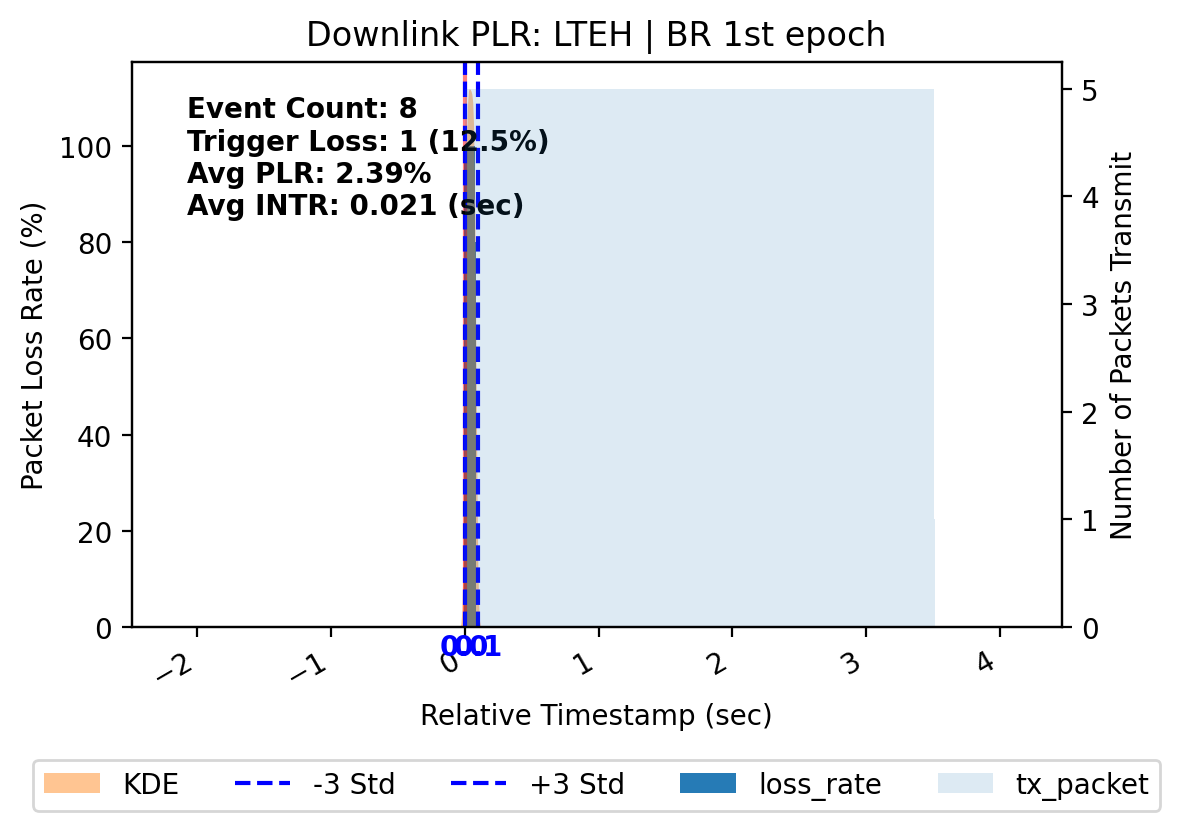

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_MCGH_1st.png


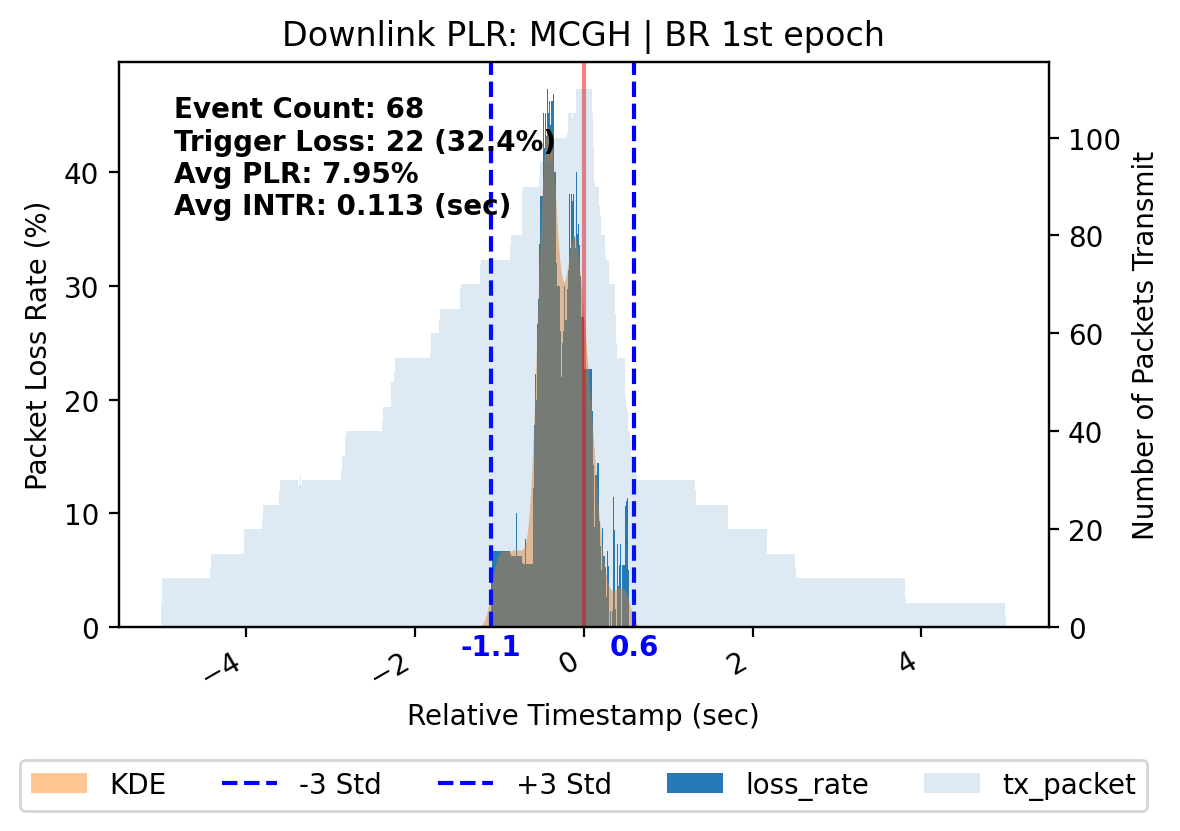

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_MNBH_1st.png


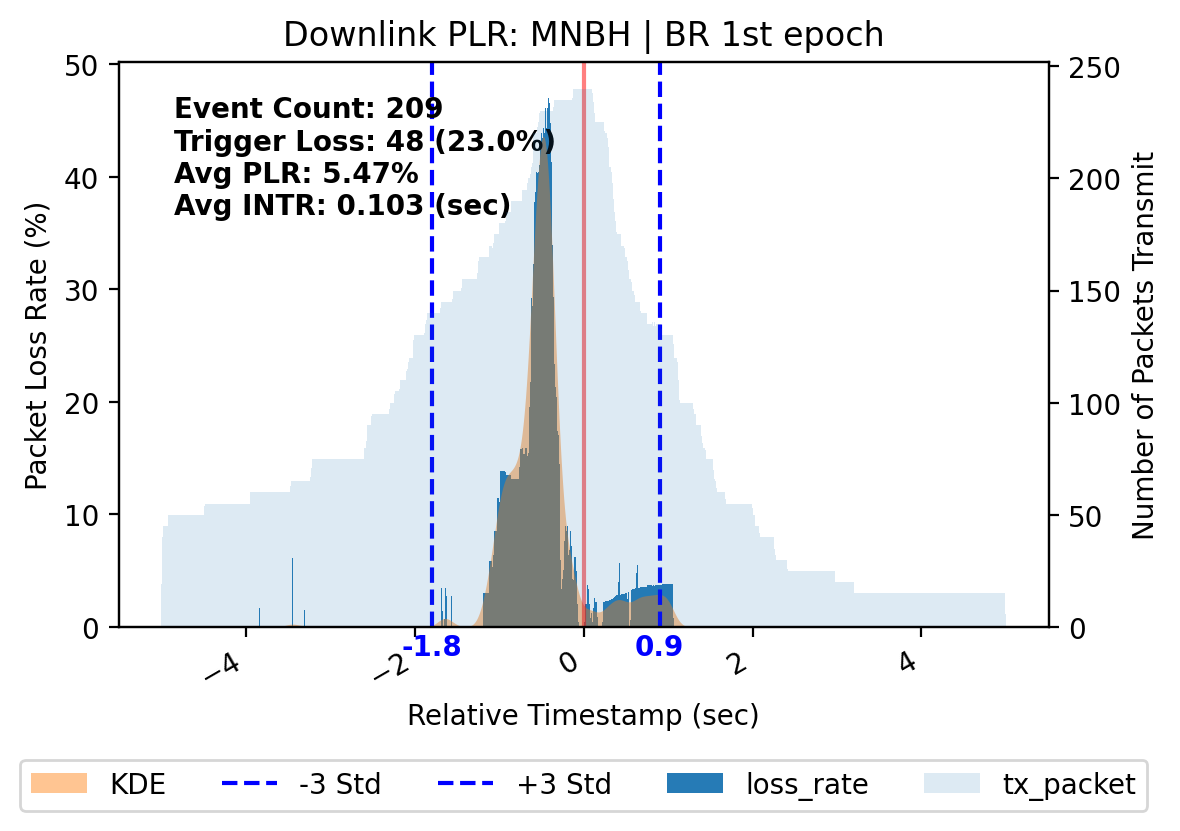

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGM_1st.png


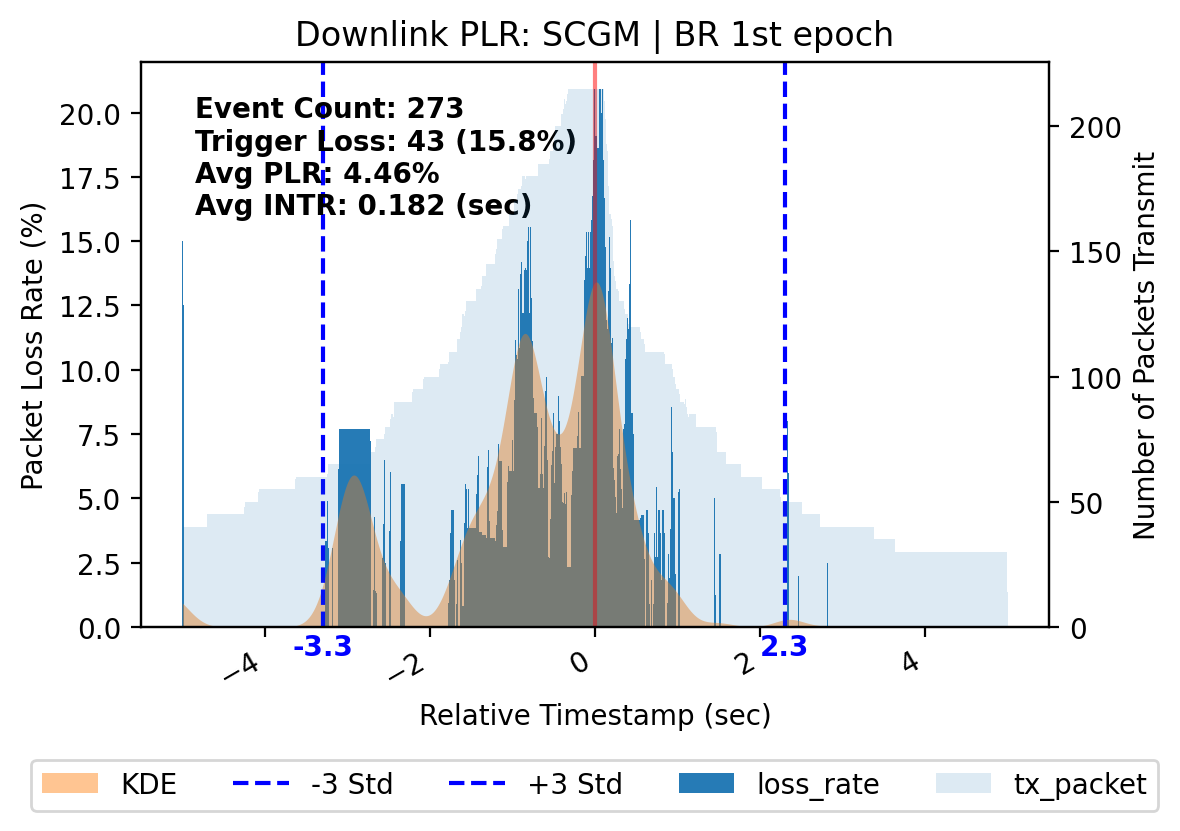

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGR-II_1st.png


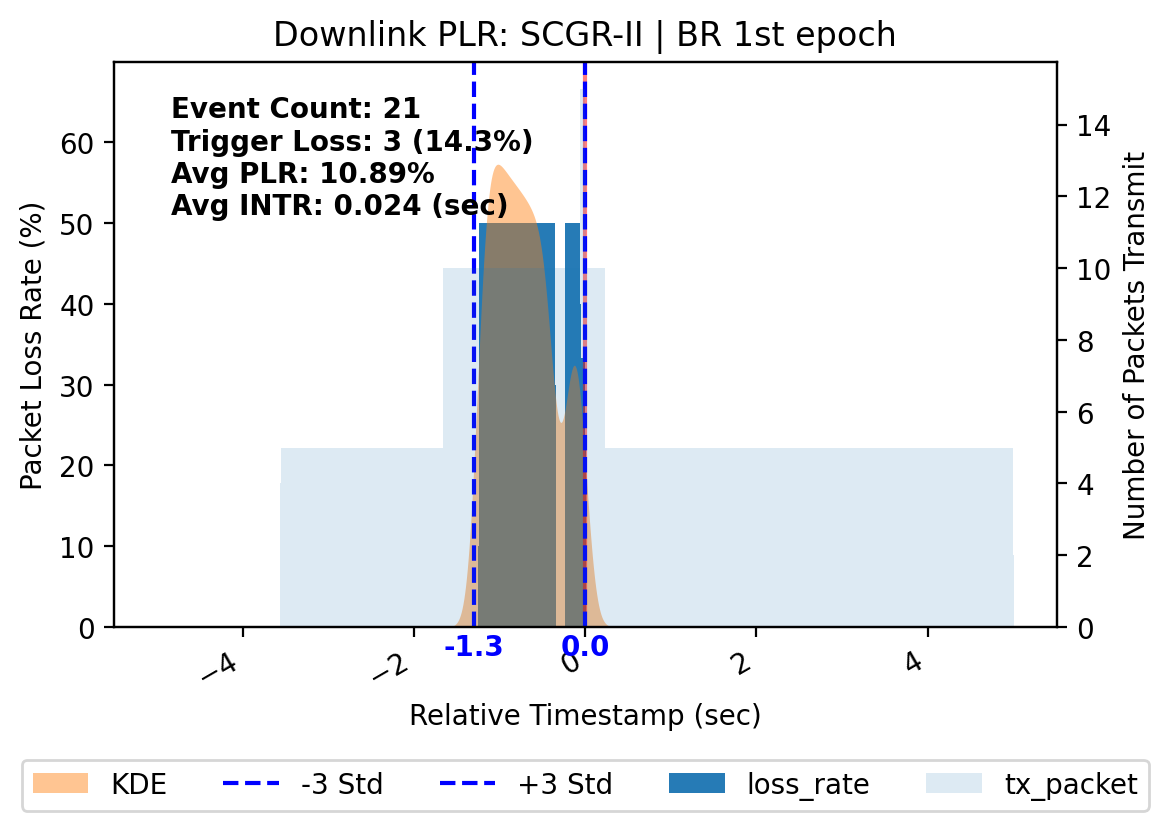

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGC-I_1st.png


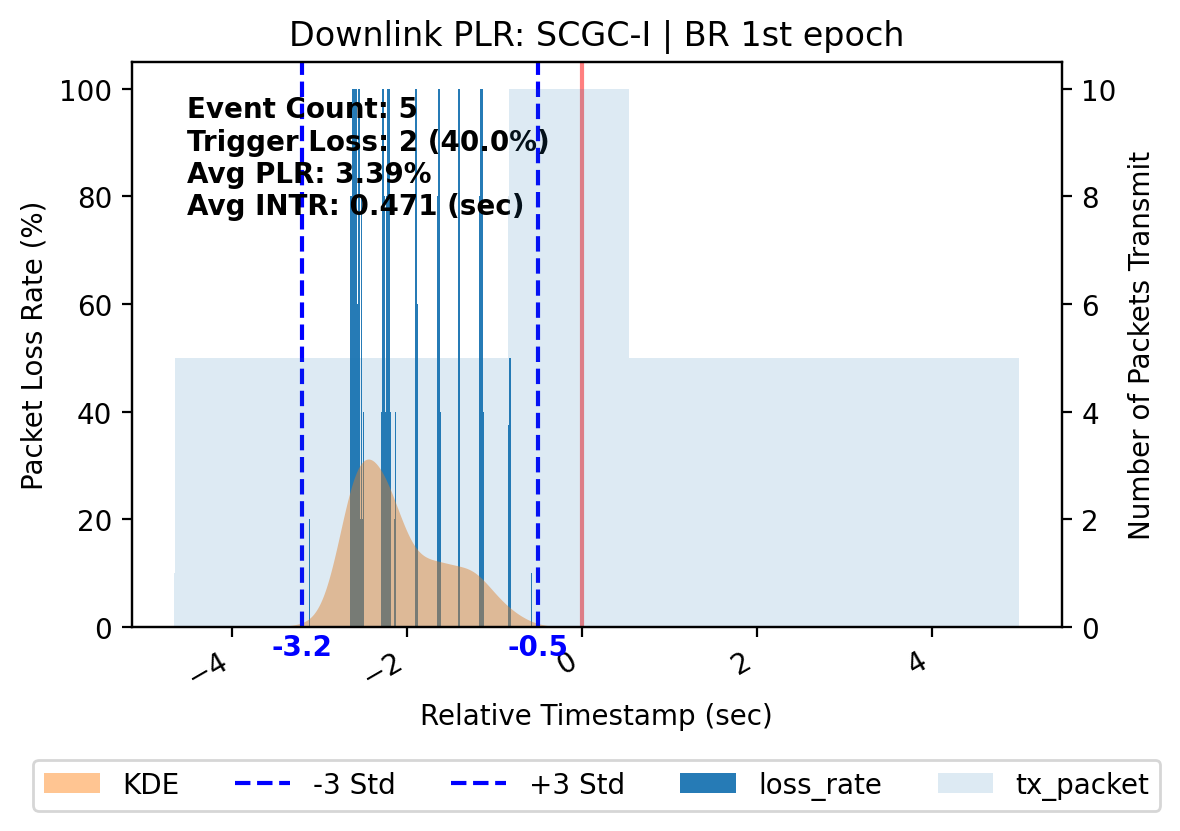

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGC-II_1st.png


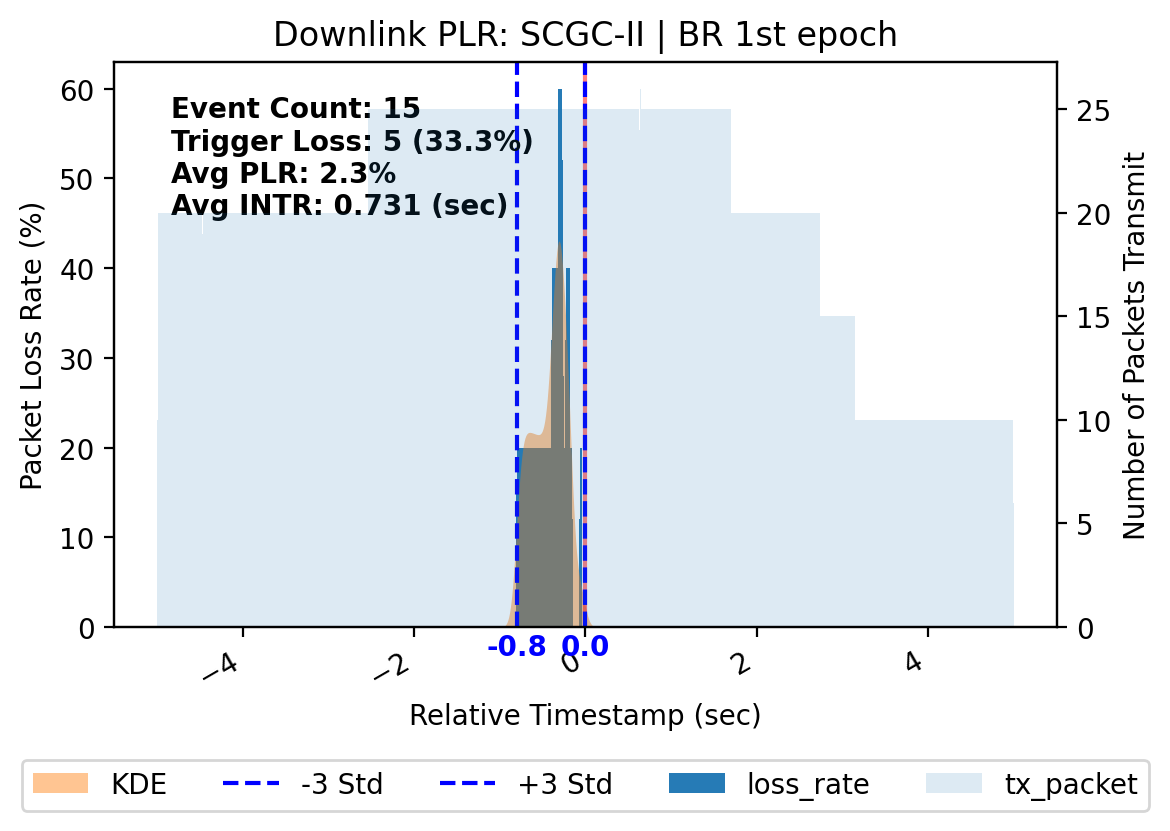

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGF_1st.png


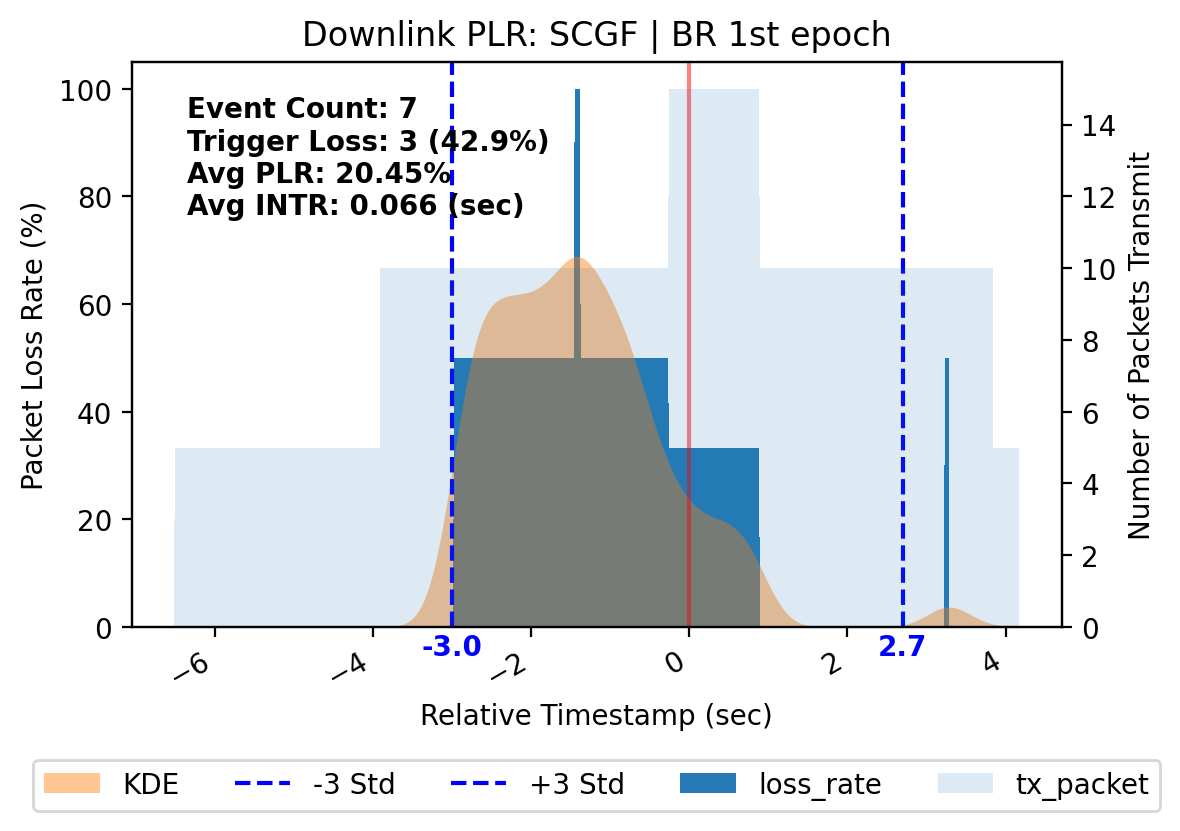

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_MCGF_1st.png


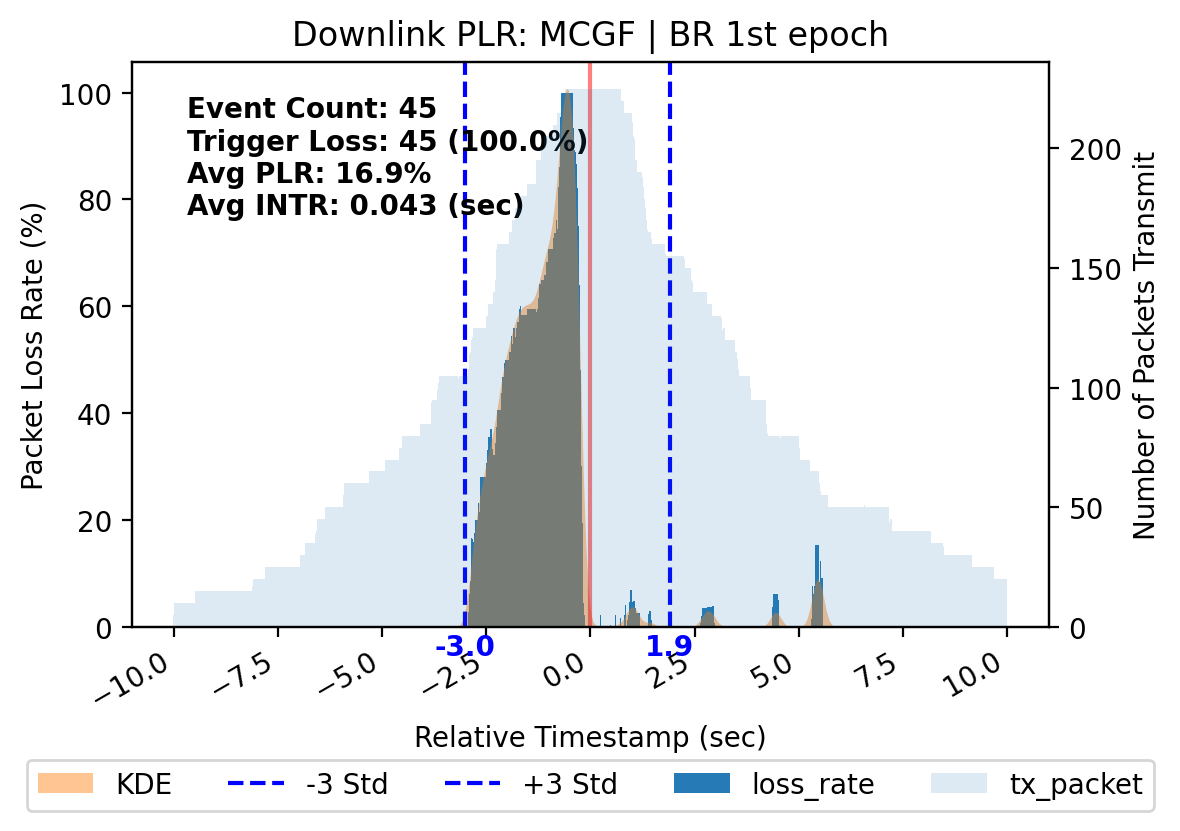

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_Stable_1st.png


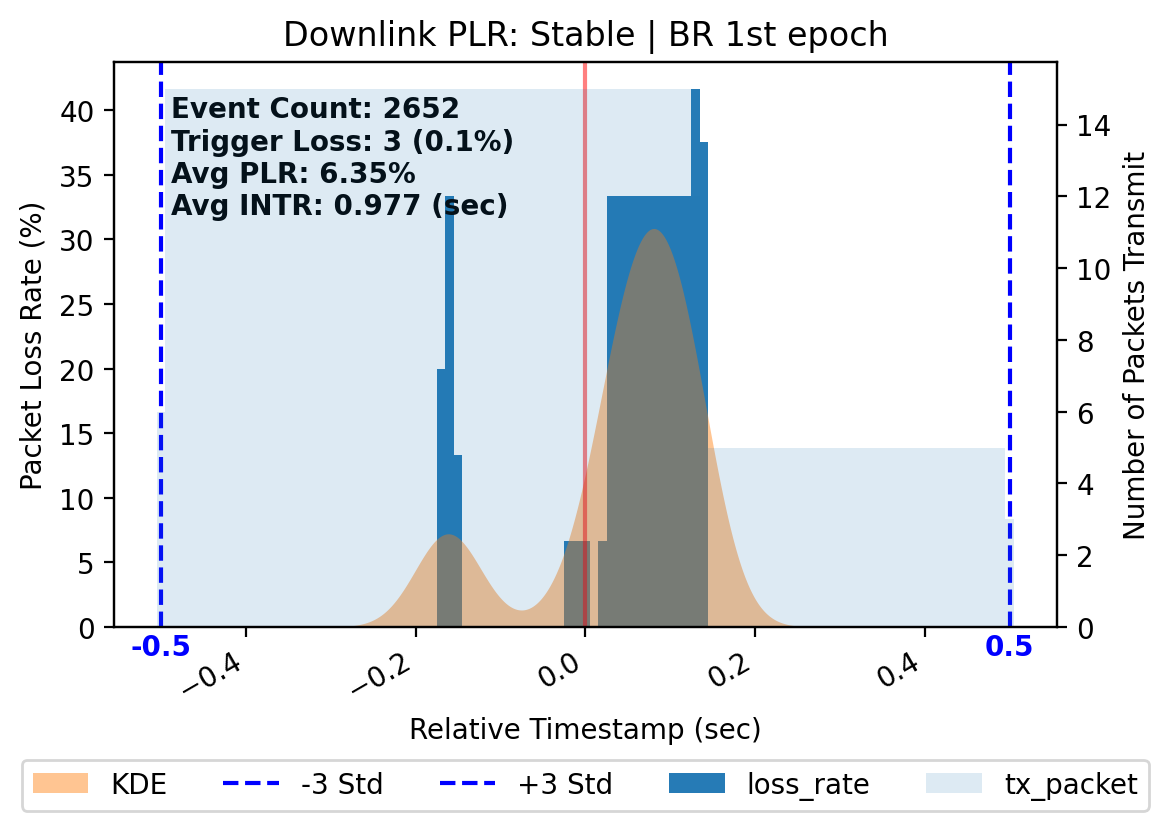

1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_dnlk_loss_latency.csv
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv
--------------
Size of Profiles: 22.43 MB
Total Size: 33.18 MB
./20240415_1604003926_test/sr/dl_lost/models/plot/BR_LTEH.png


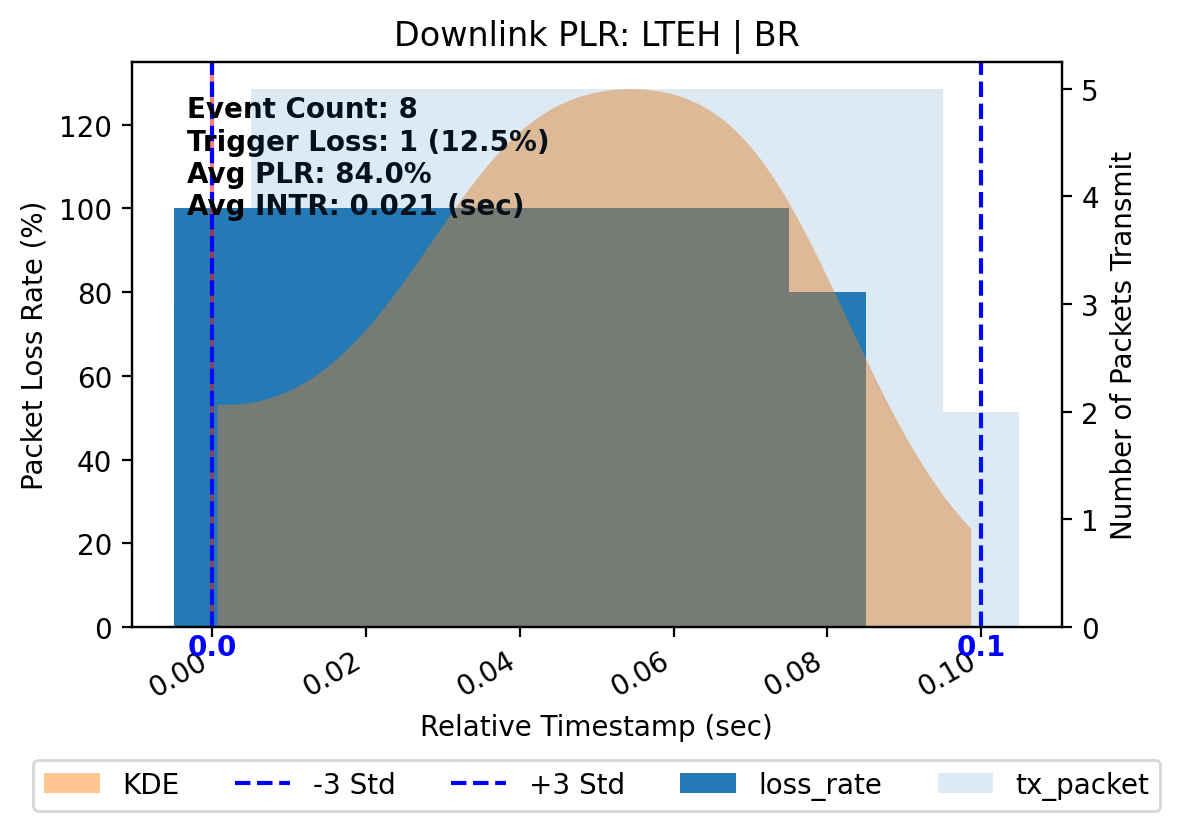

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_MCGH.png


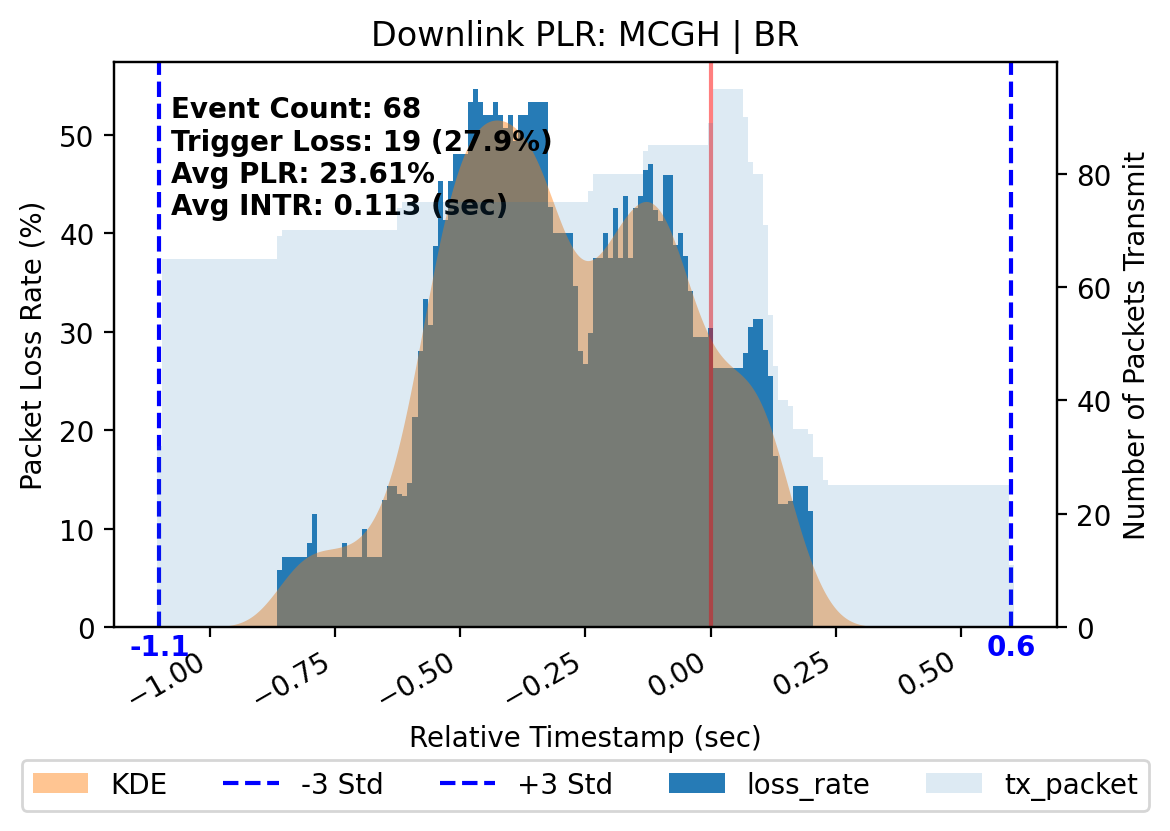

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_MNBH.png


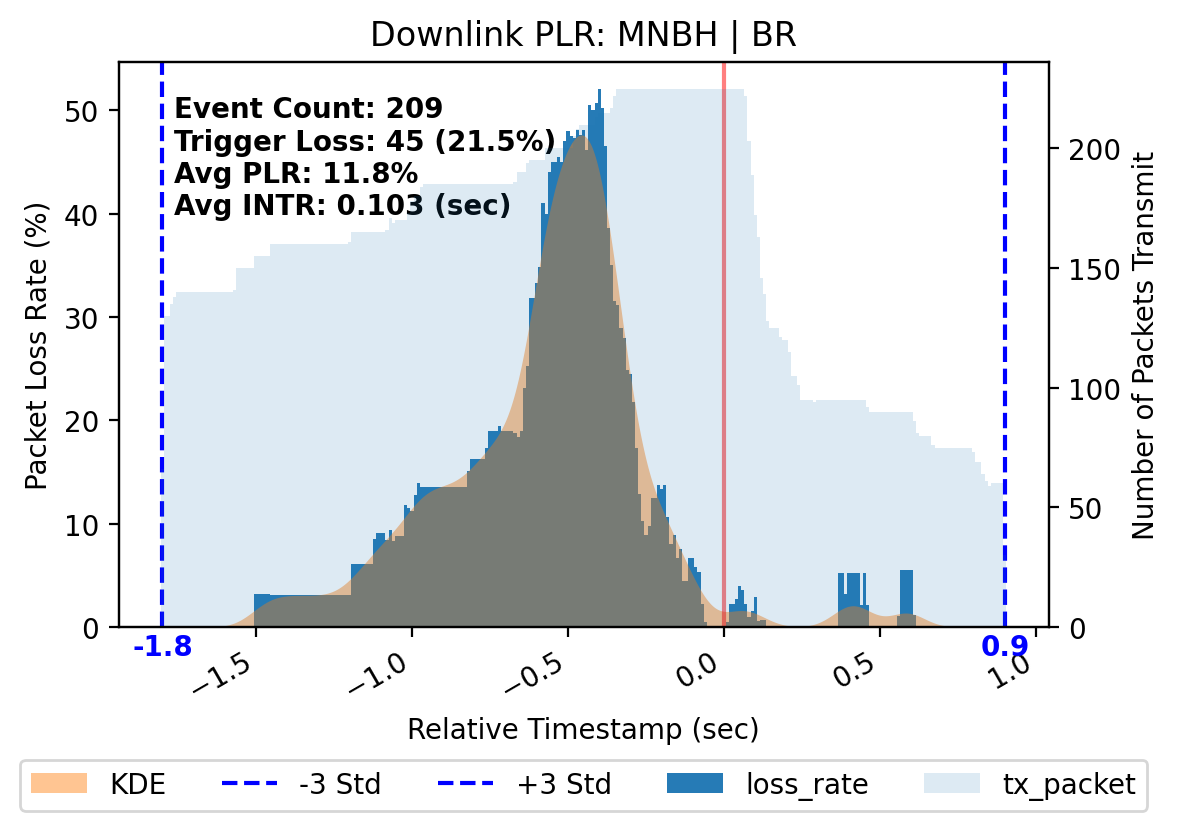

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGM.png


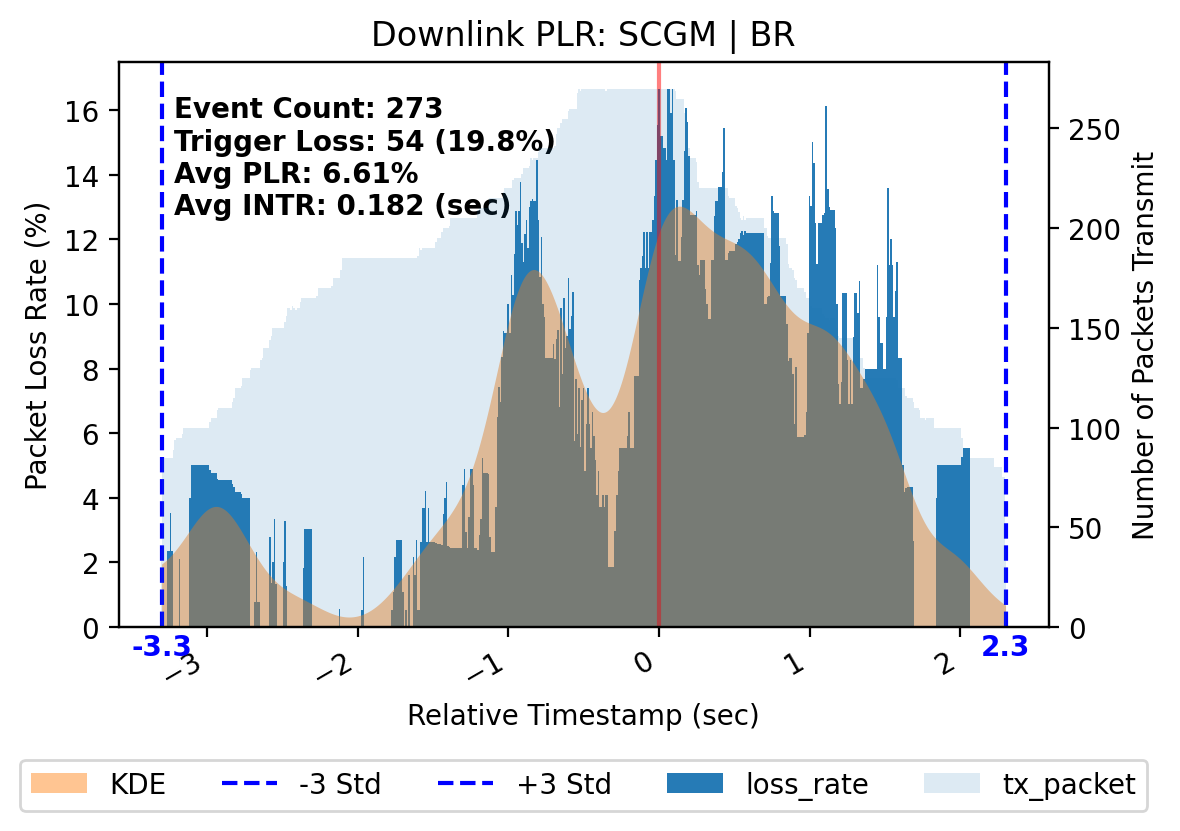

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGA.png


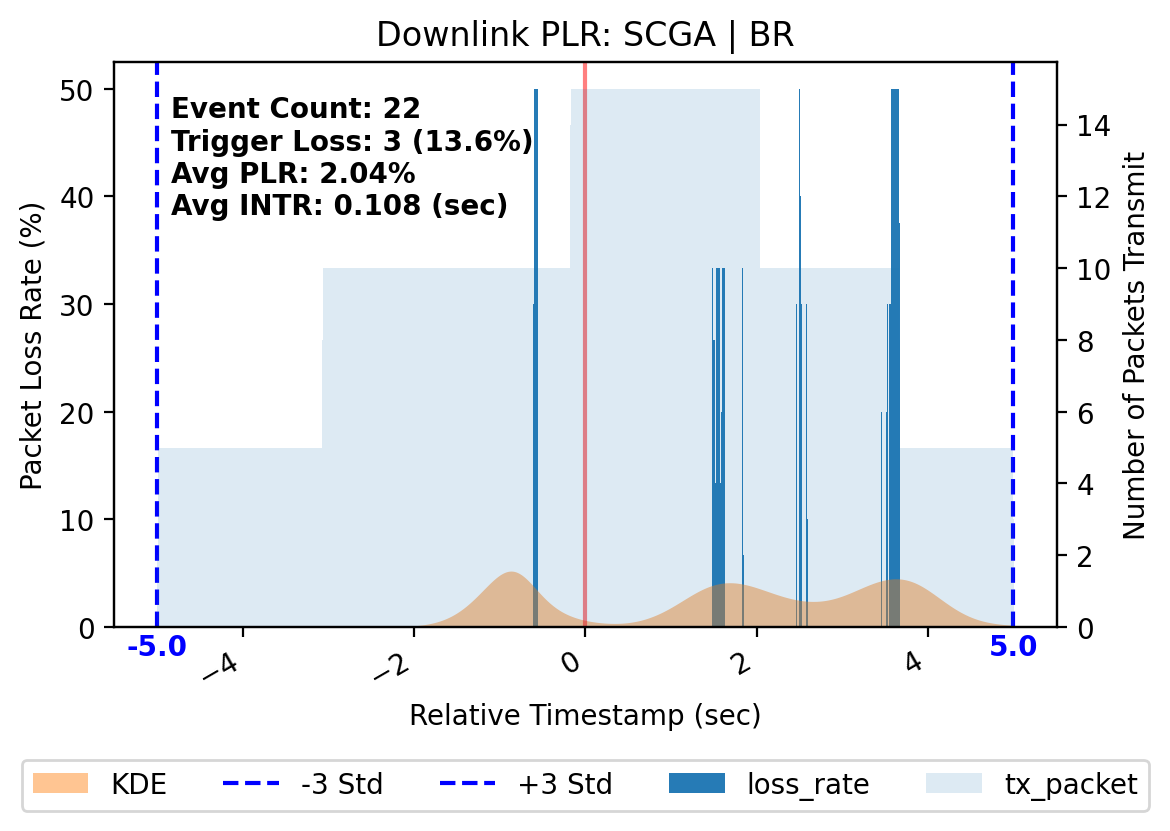

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGR-II.png


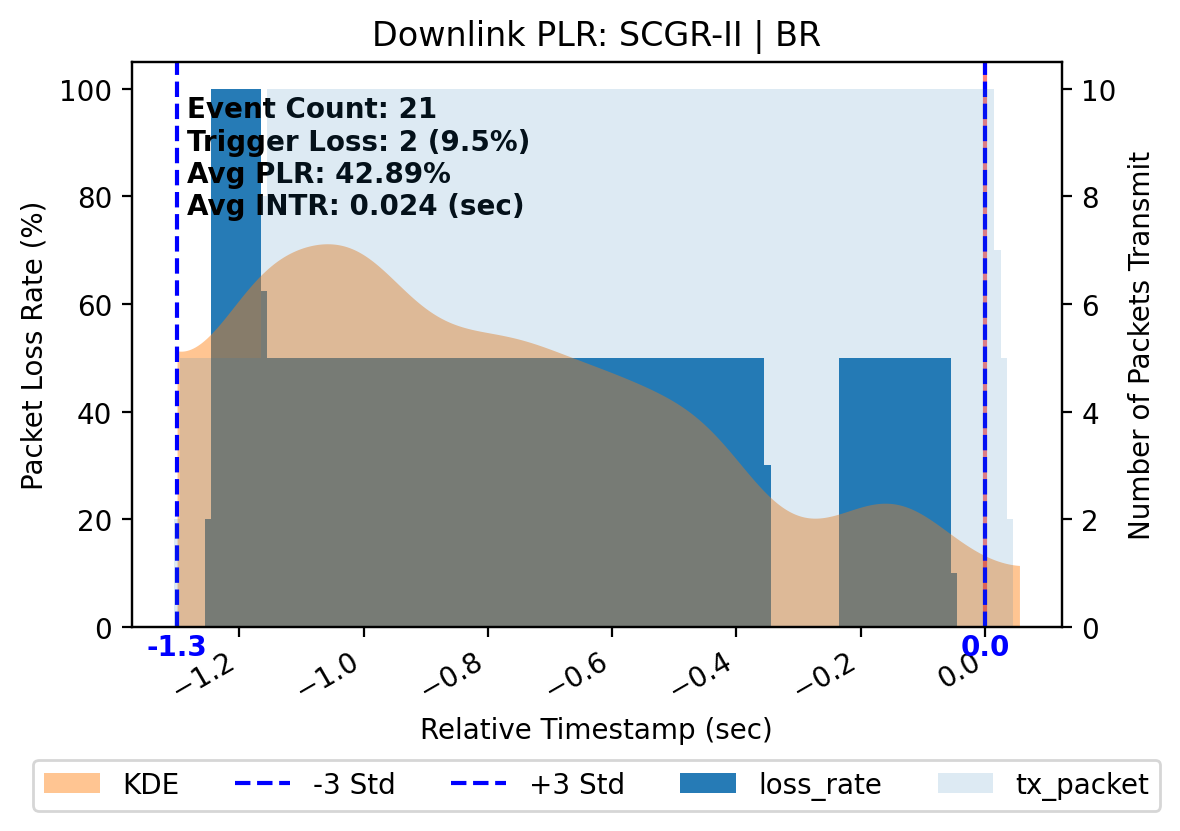

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGC-I.png


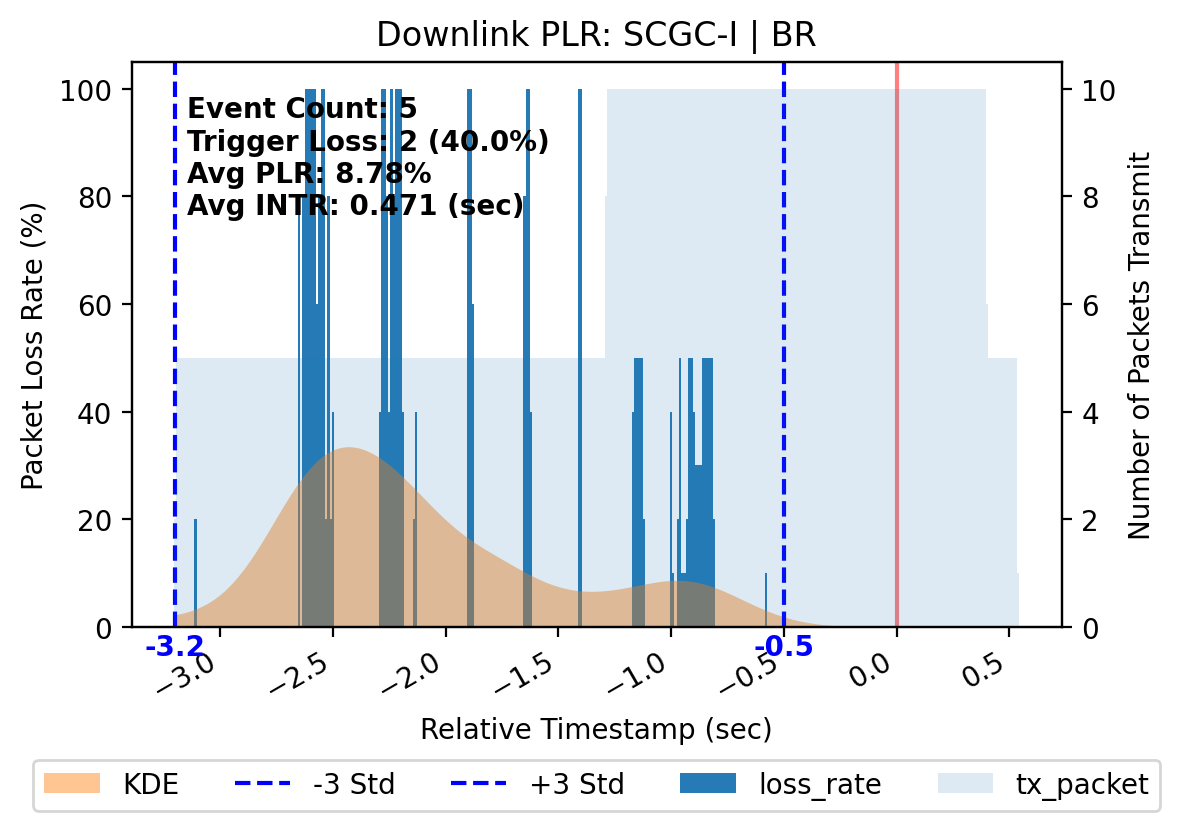

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGC-II.png


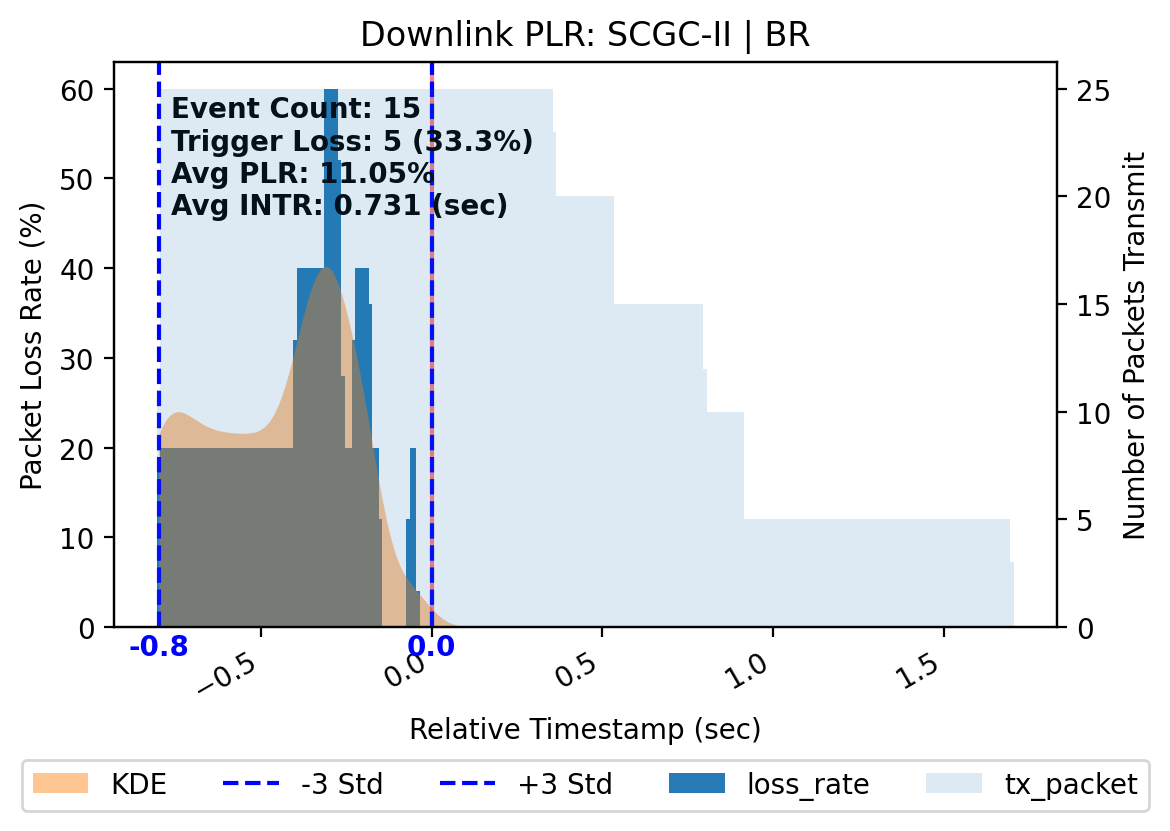

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_SCGF.png


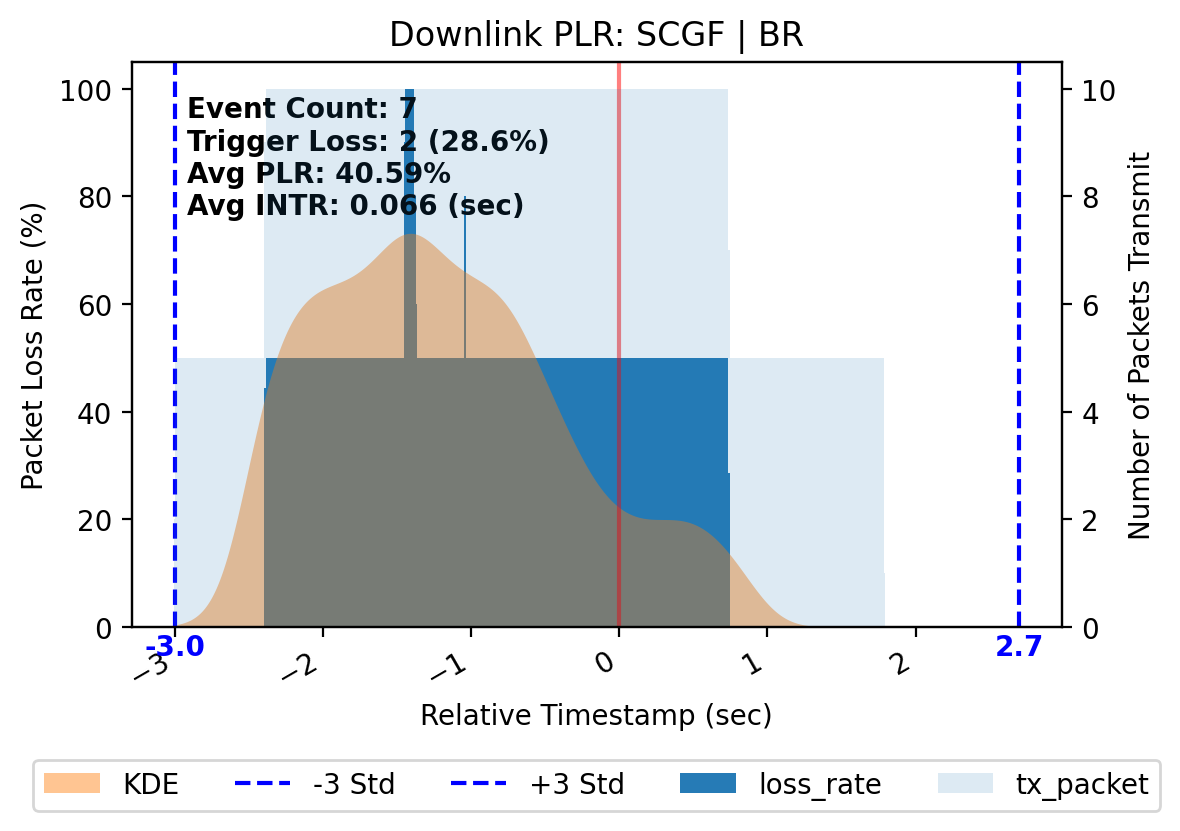

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_MCGF.png


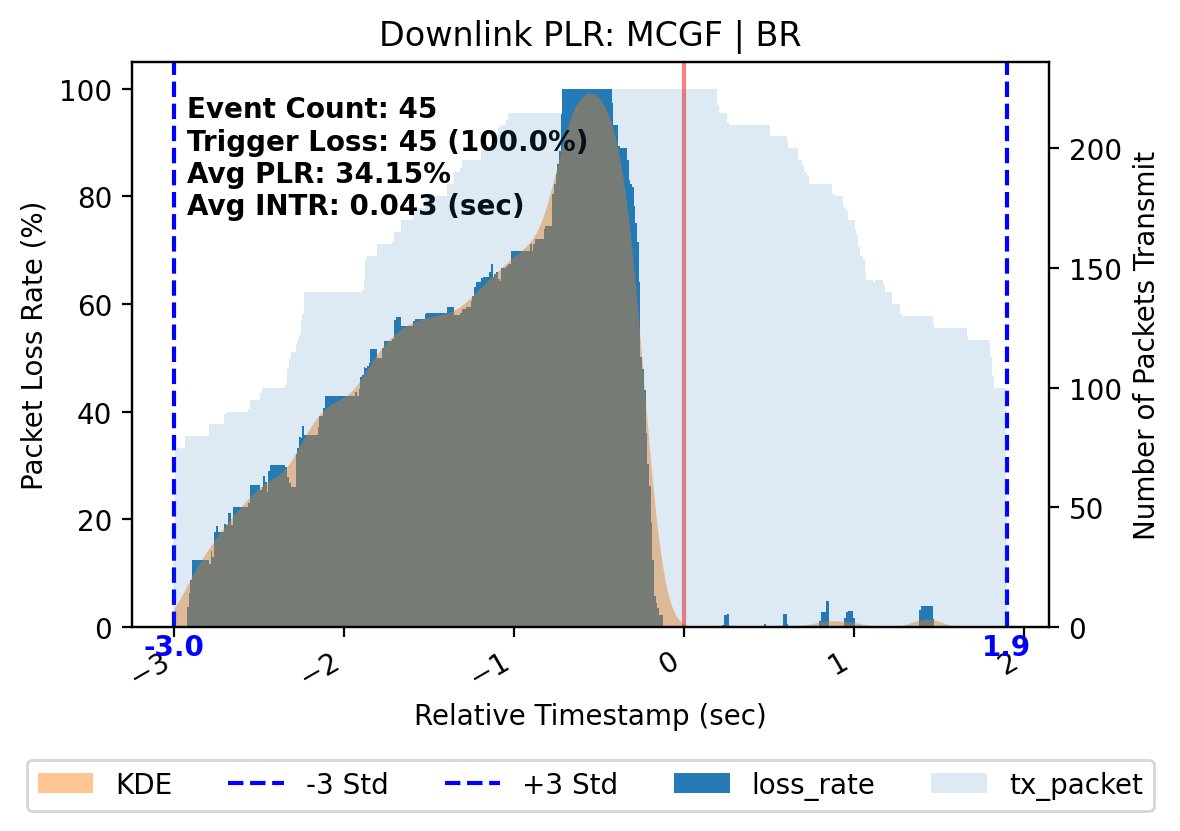

./20240415_1604003926_test/sr/dl_lost/models/plot/BR_Stable.png


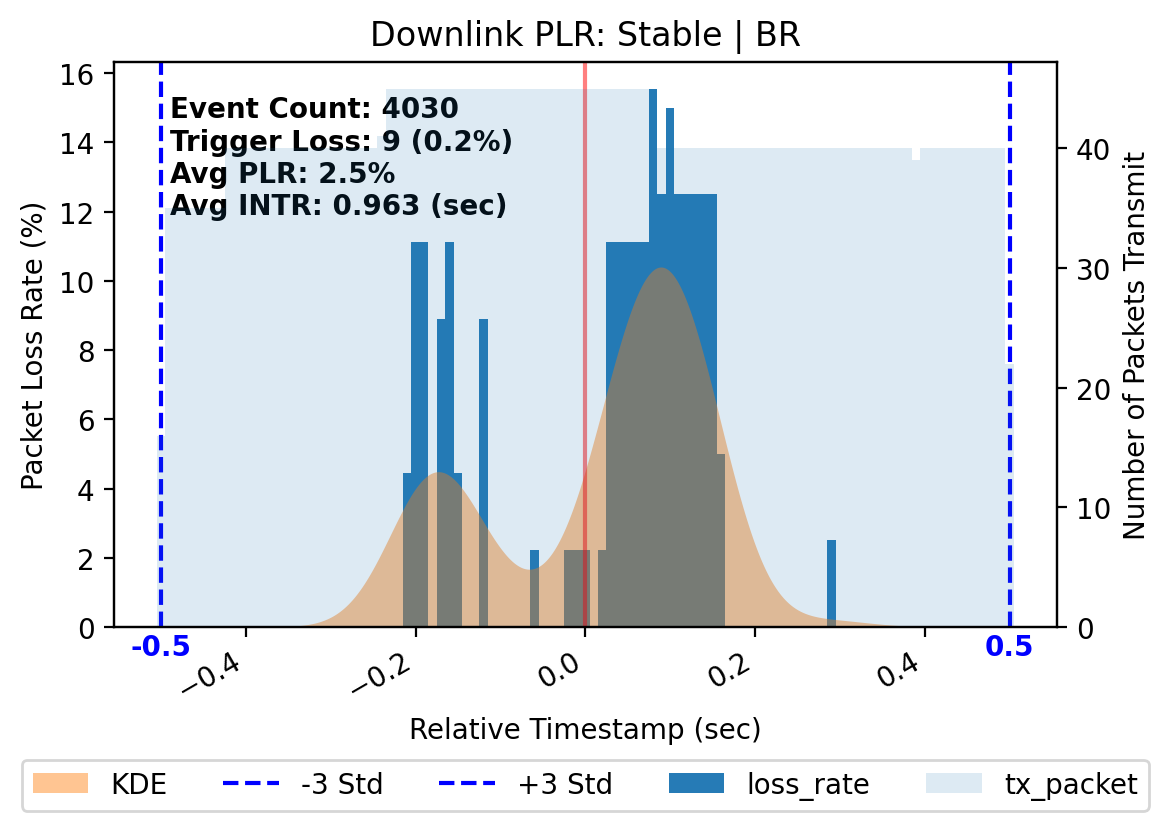

Save models: BR -> ./20240415_1604003926_test/sr/dl_lost/models



In [4]:
model = Profile(filepaths, 'BR', model_id, model_dscp, dirc_mets=dirc_mets, epochs=epochs, test_mode=test_mode)

# A Models

In [46]:
# Single Radio Example
# dates = data_loader(query_dates=True)

# selected_dates = [s for s in dates if s >= '2023-09-12']
selected_dates = ['2024-03-20']
# excluded_dates = []
# selected_exps = []
# excluded_exps = ['Modem_Action_Test', 'Control_Group', 'Control_Group2', 'Control_Group3']
selected_routes = ['A']
# excluded_routes = []
filepaths = data_loader(mode='sr', selected_dates=selected_dates, selected_routes=selected_routes)

print(len(filepaths))
# pprint(filepaths)

18


. 20240407_13370041ed_test A 1st dl_lost
1/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
2/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
2/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
3/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
3/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
4/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
4/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
5/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
5/18 /home/wmnlab/F/database/2024-03-20/UDP

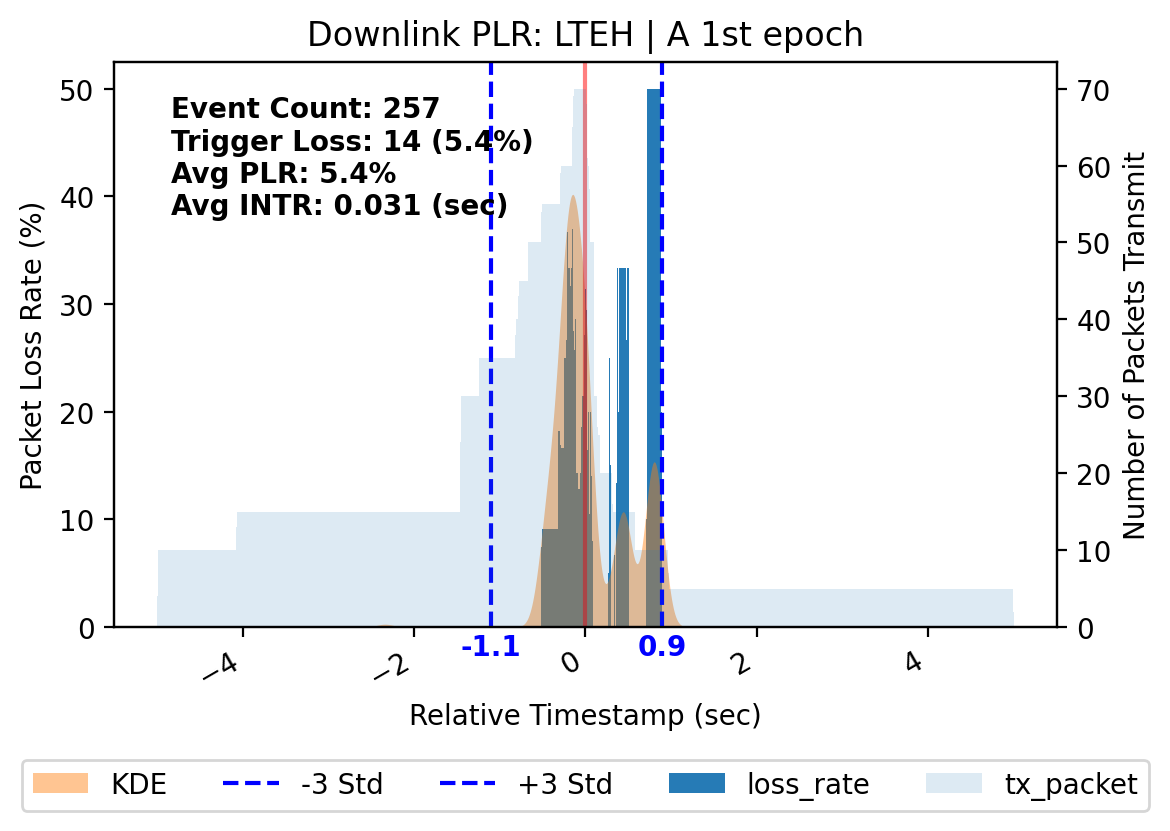

./20240407_13370041ed_test/dl_lost/models/plot/A_ENBH_1st.png


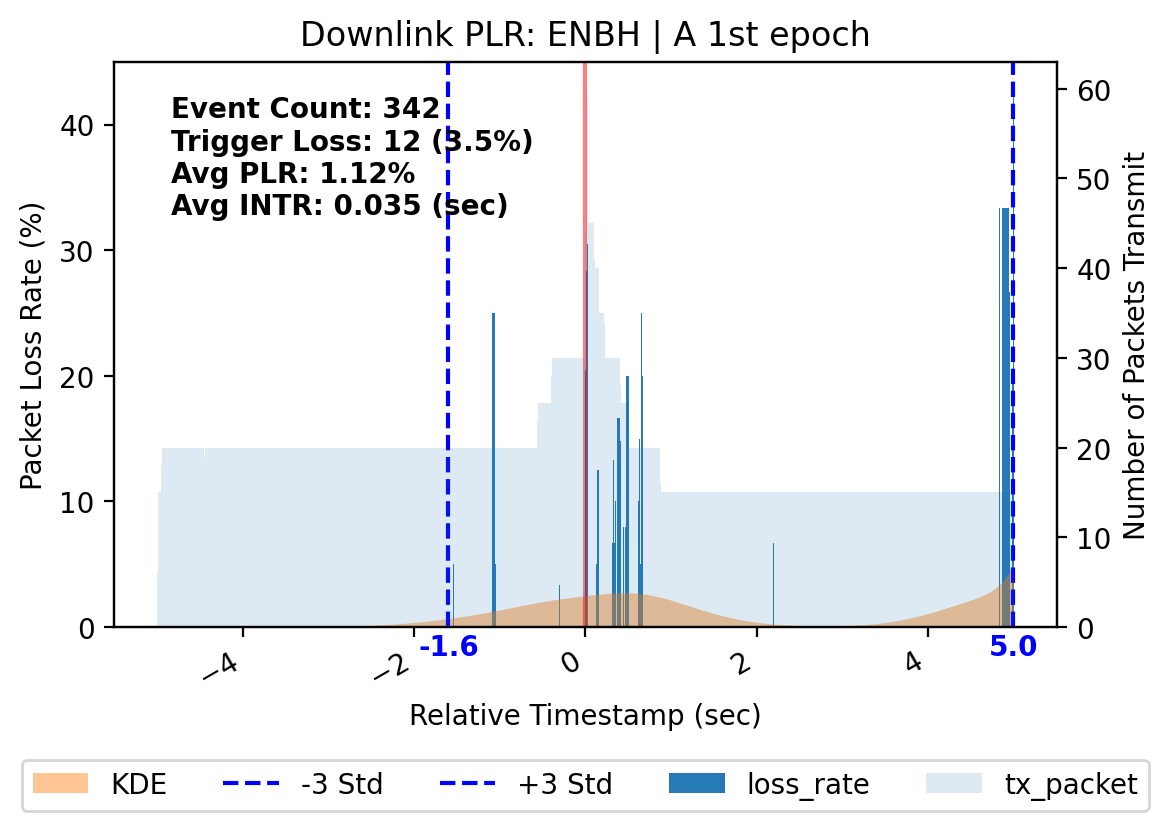

./20240407_13370041ed_test/dl_lost/models/plot/A_MCGH_1st.png


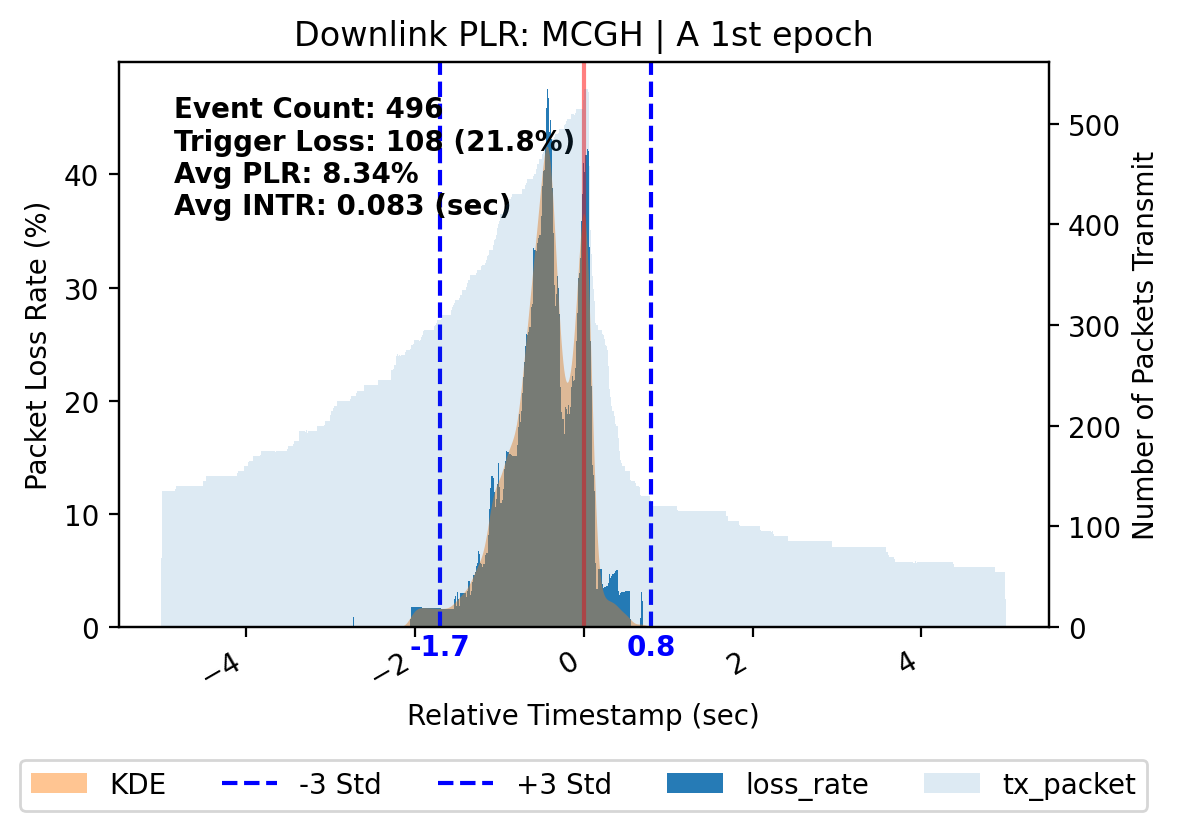

./20240407_13370041ed_test/dl_lost/models/plot/A_MNBH_1st.png


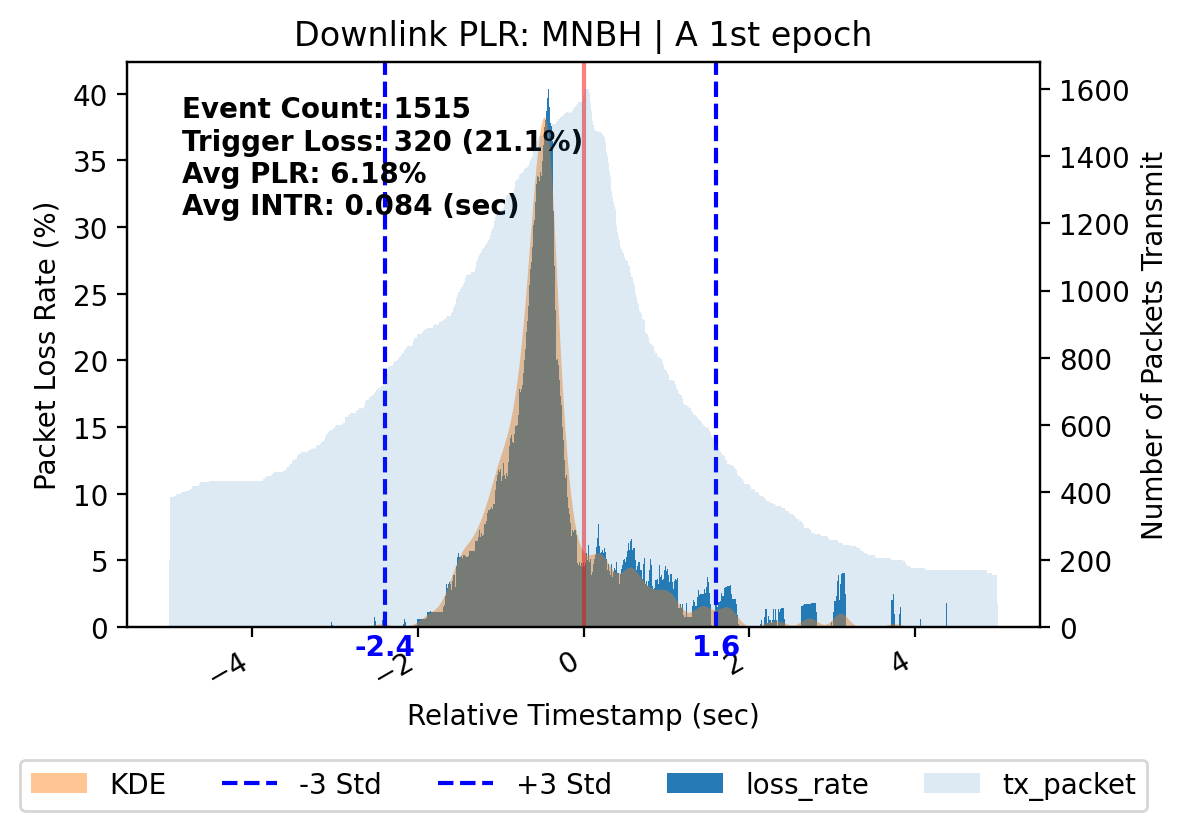

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGM_1st.png


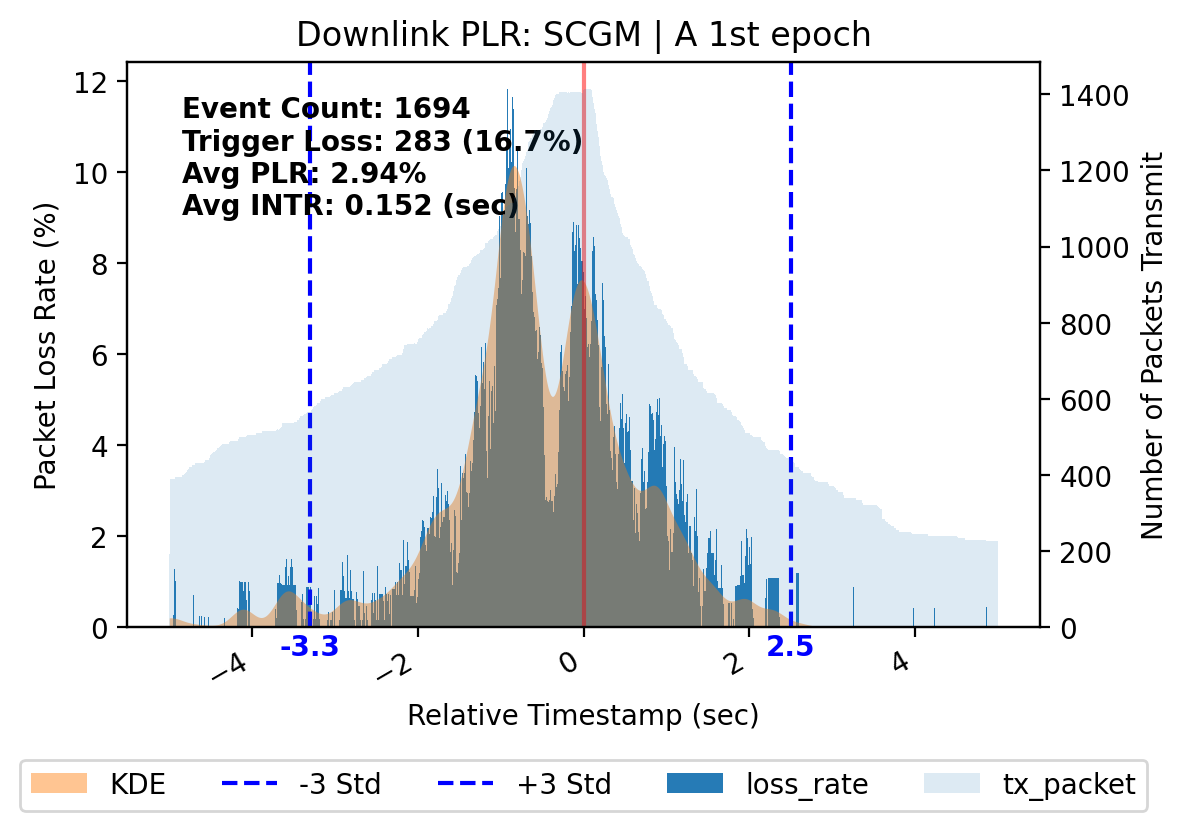

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGA_1st.png


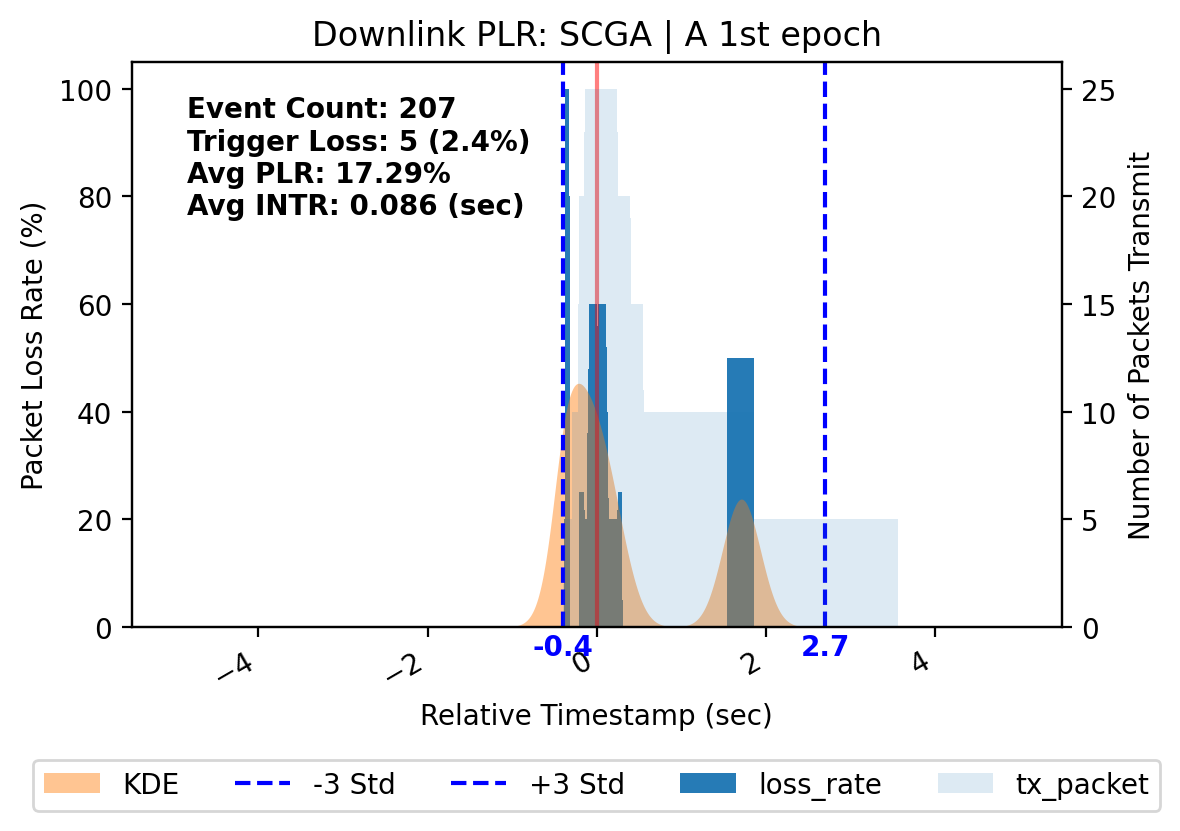

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGR-I_1st.png


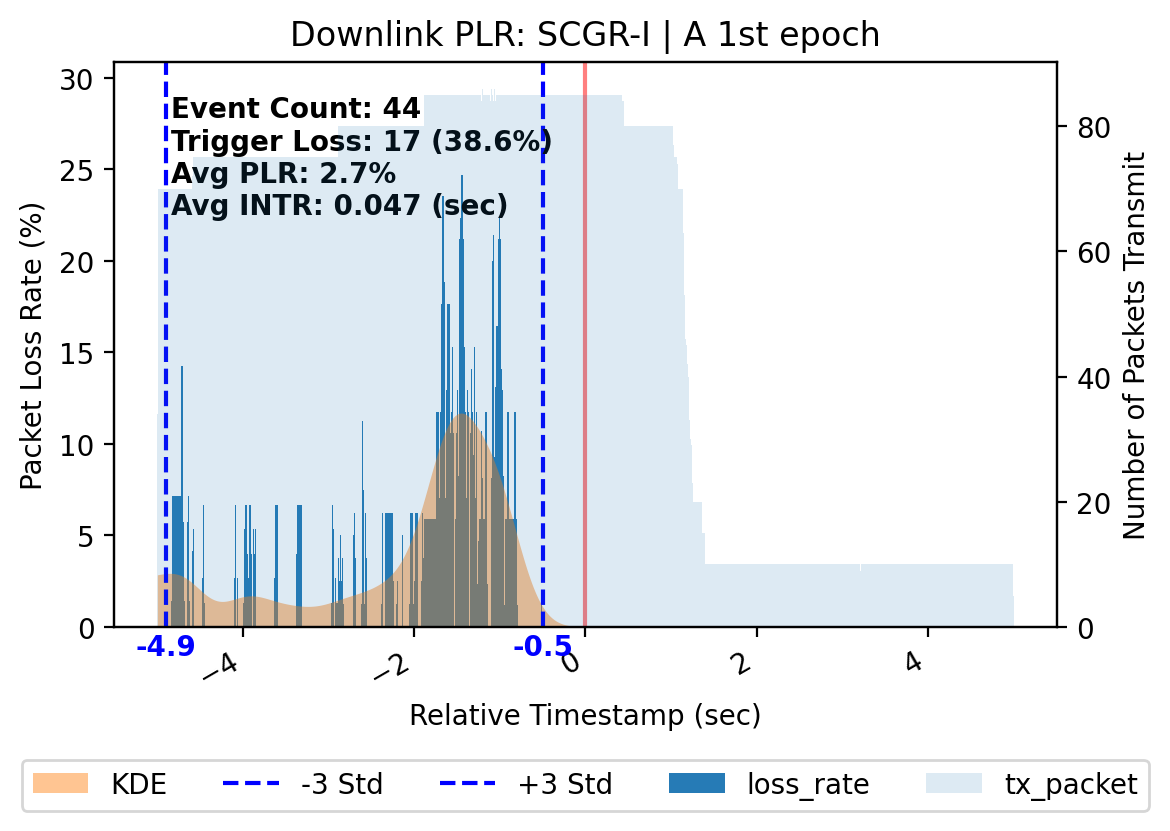

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGR-II_1st.png


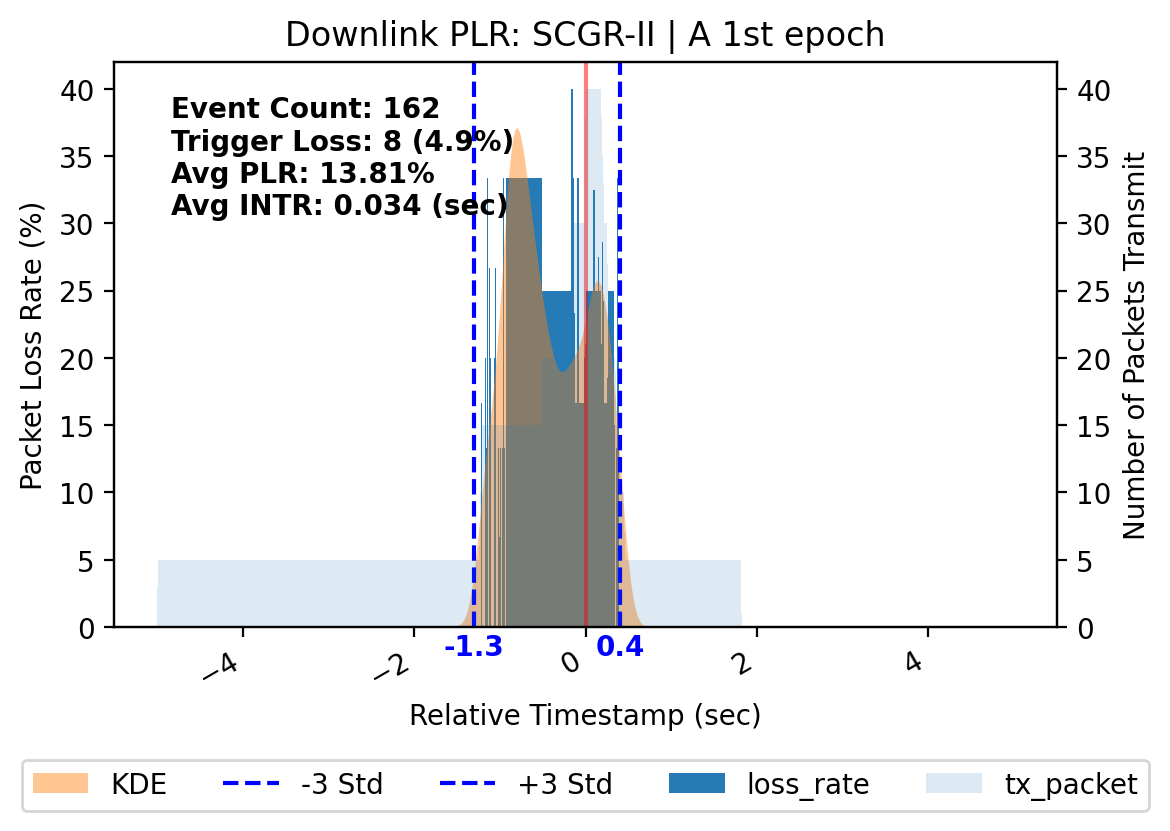

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGC-I_1st.png


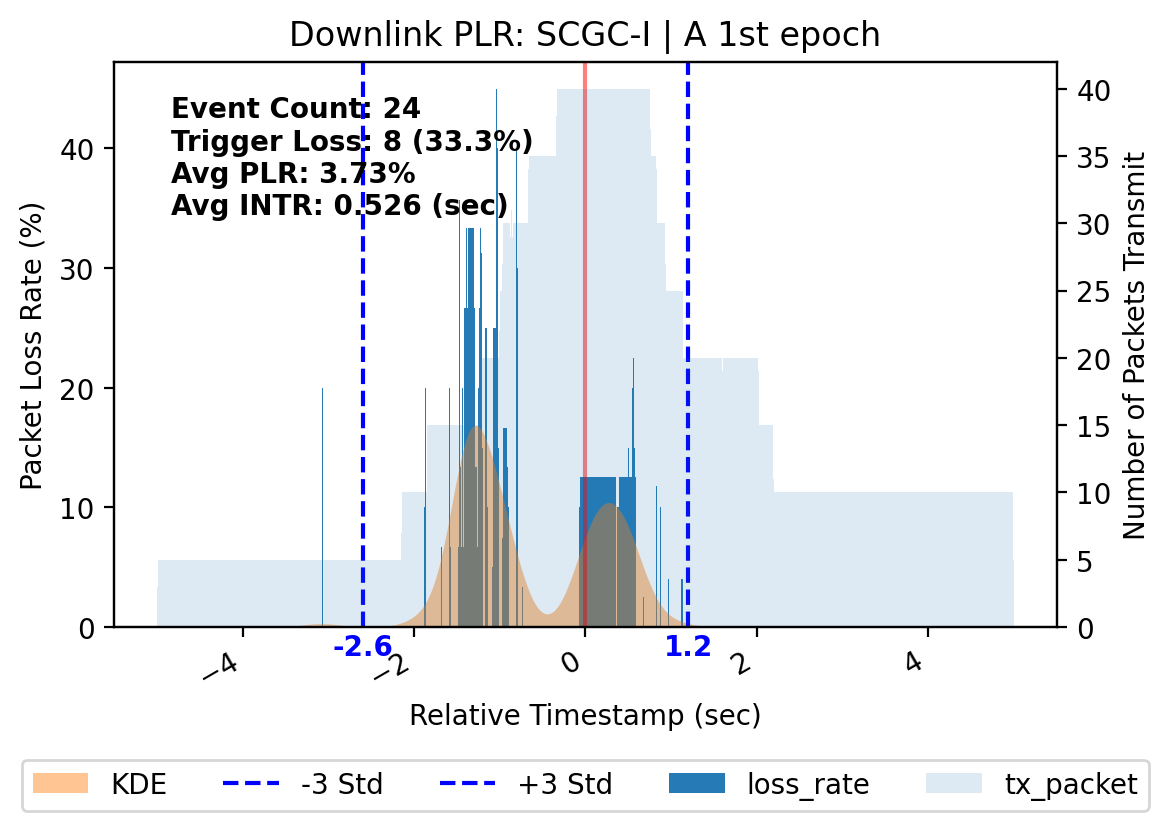

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGC-II_1st.png


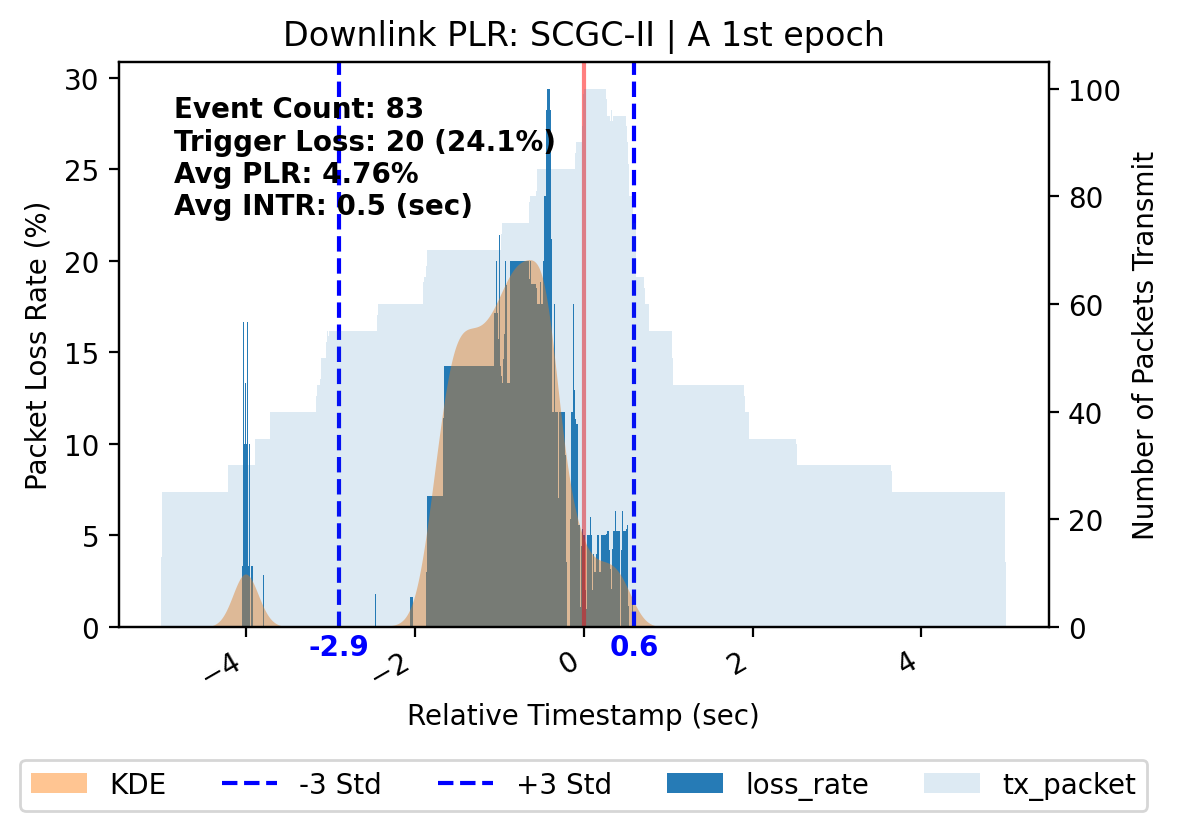

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGF_1st.png


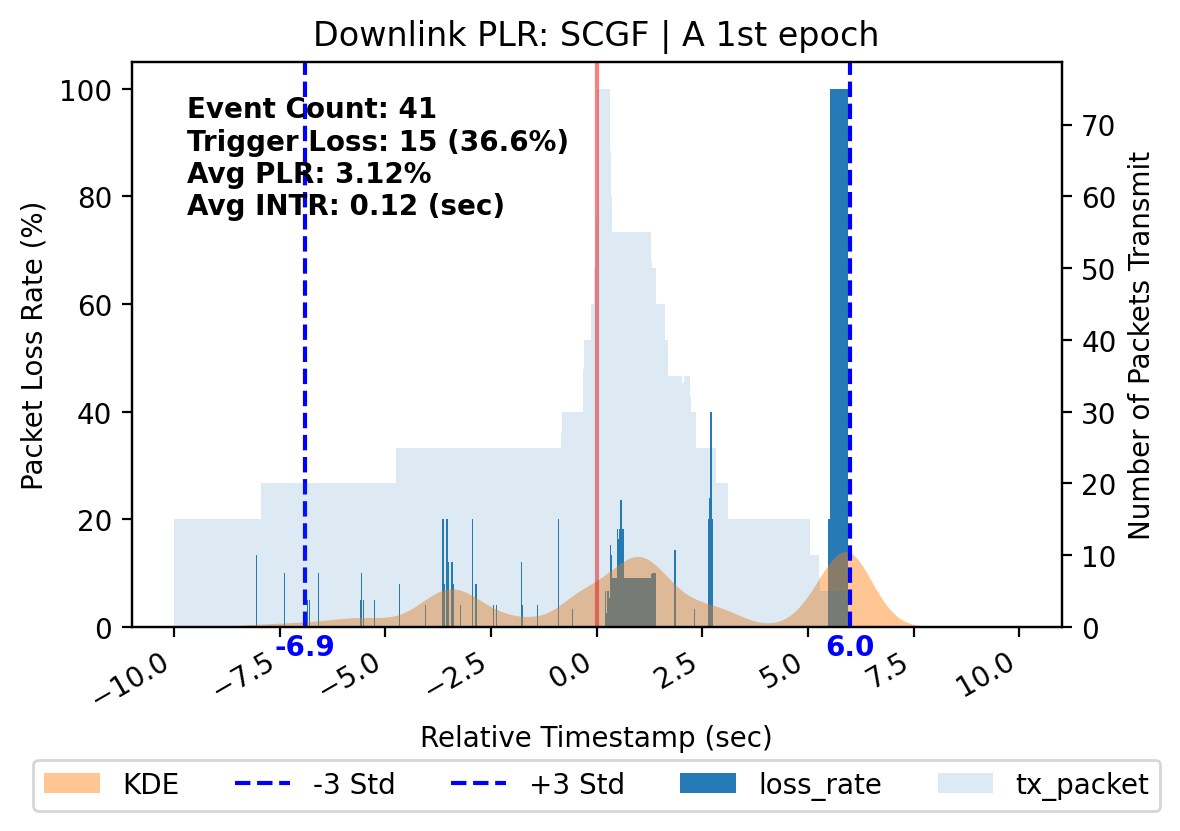

./20240407_13370041ed_test/dl_lost/models/plot/A_MCGF_1st.png


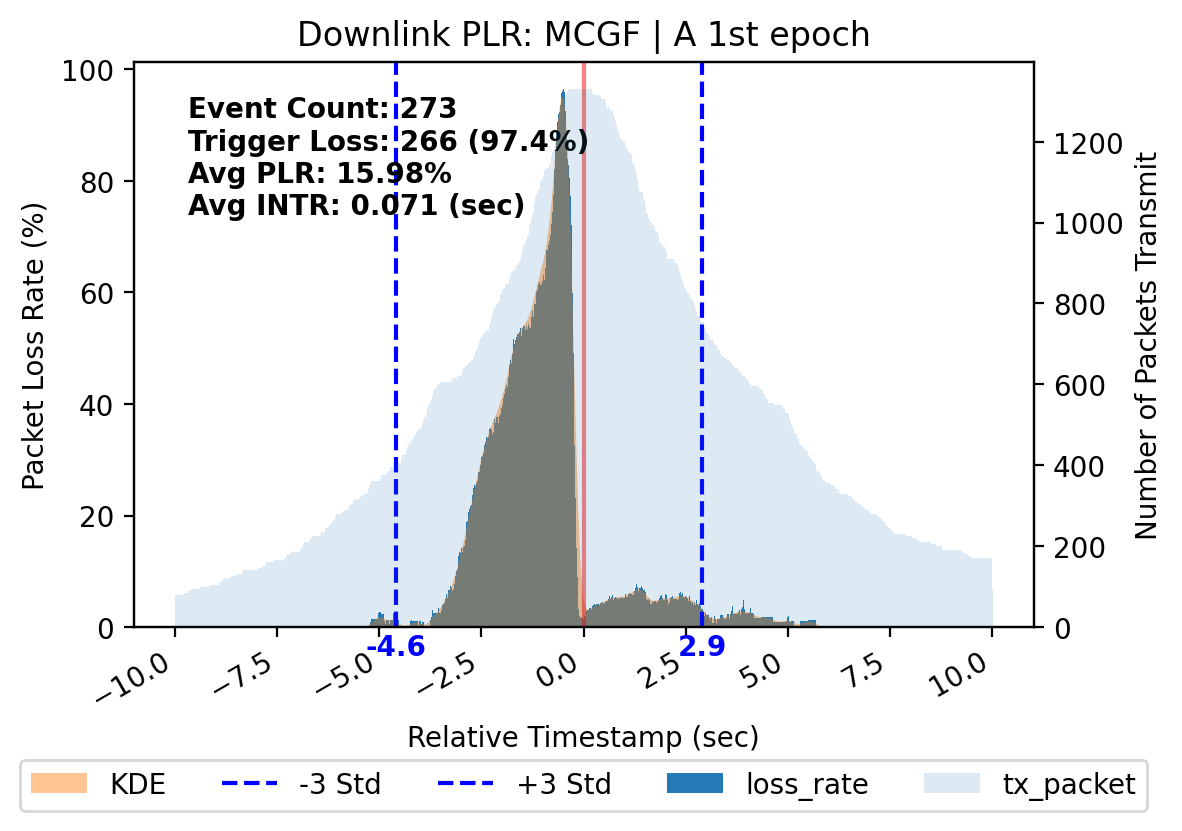

./20240407_13370041ed_test/dl_lost/models/plot/A_NASR_1st.png


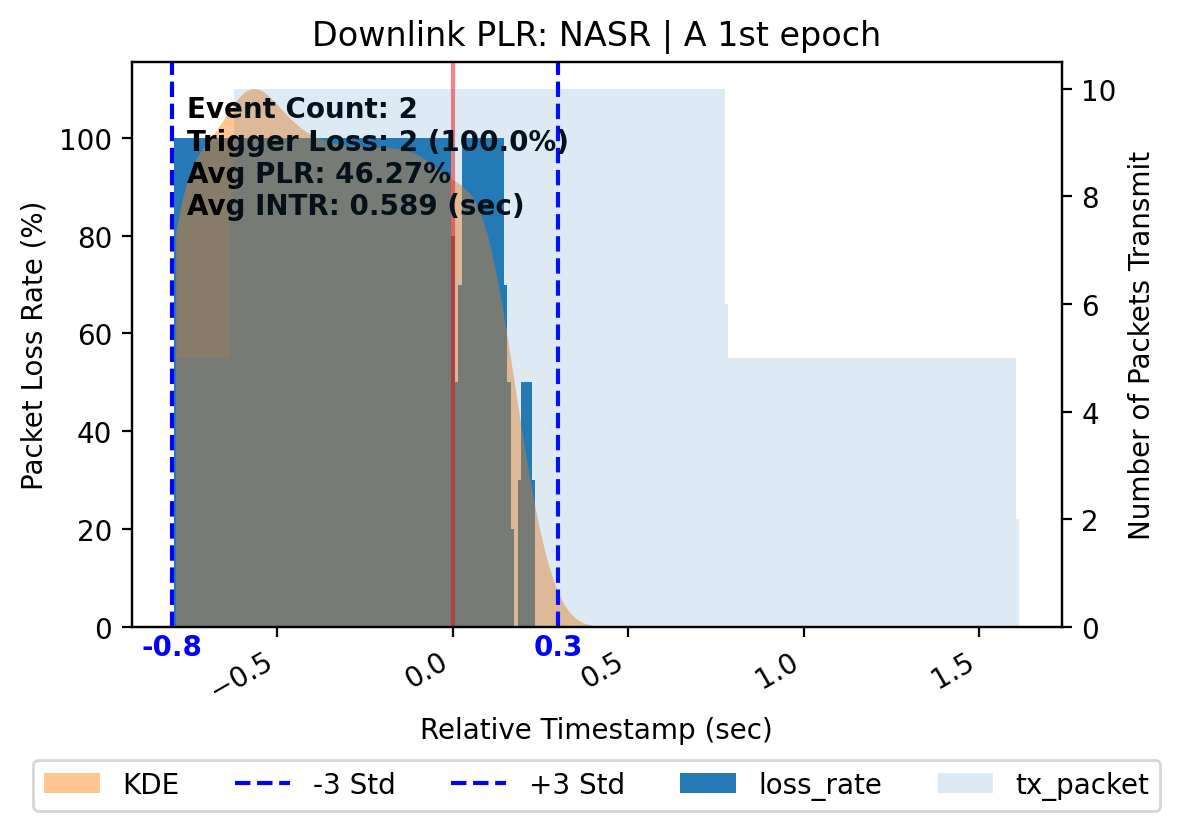

./20240407_13370041ed_test/dl_lost/models/plot/A_Stable_1st.png


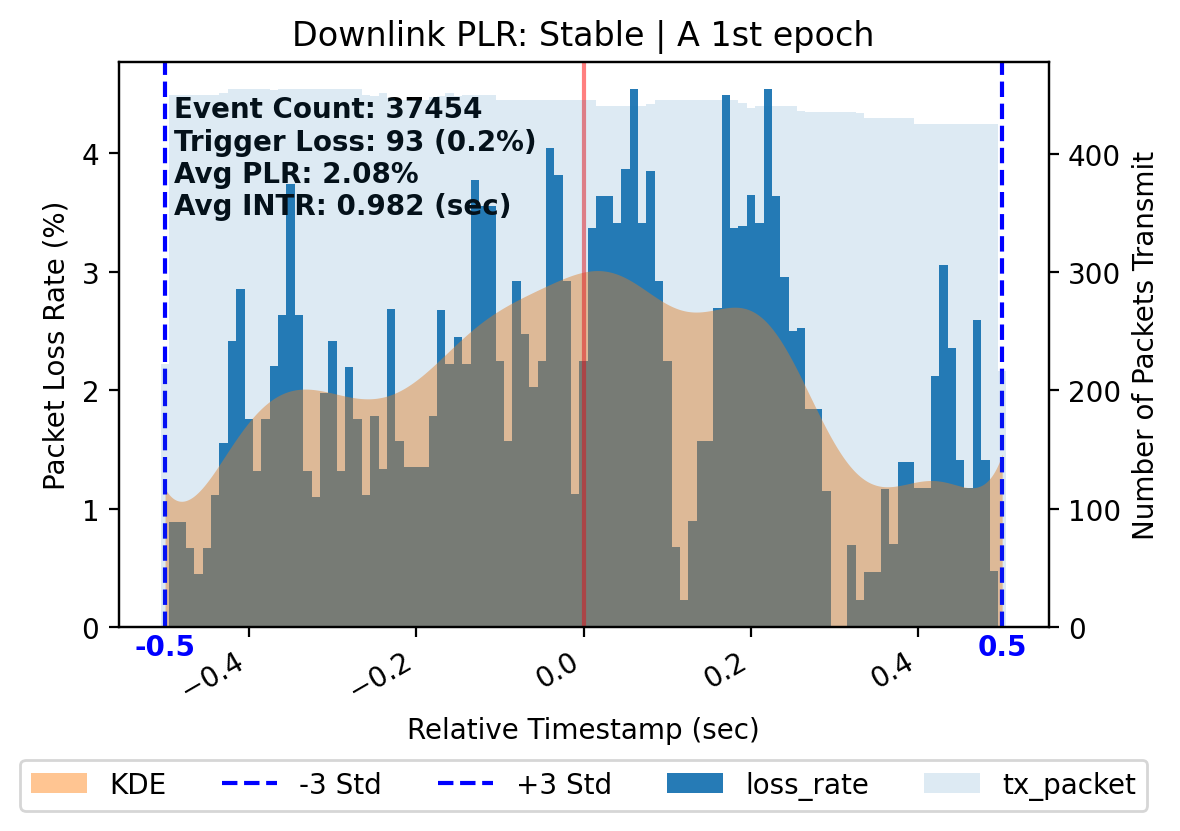

. 20240407_13370041ed_test A last dl_lost
1/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
2/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
2/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
3/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
3/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
4/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
4/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
5/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
5/18 /home/wmnlab/F/database/2024-03-20/UD

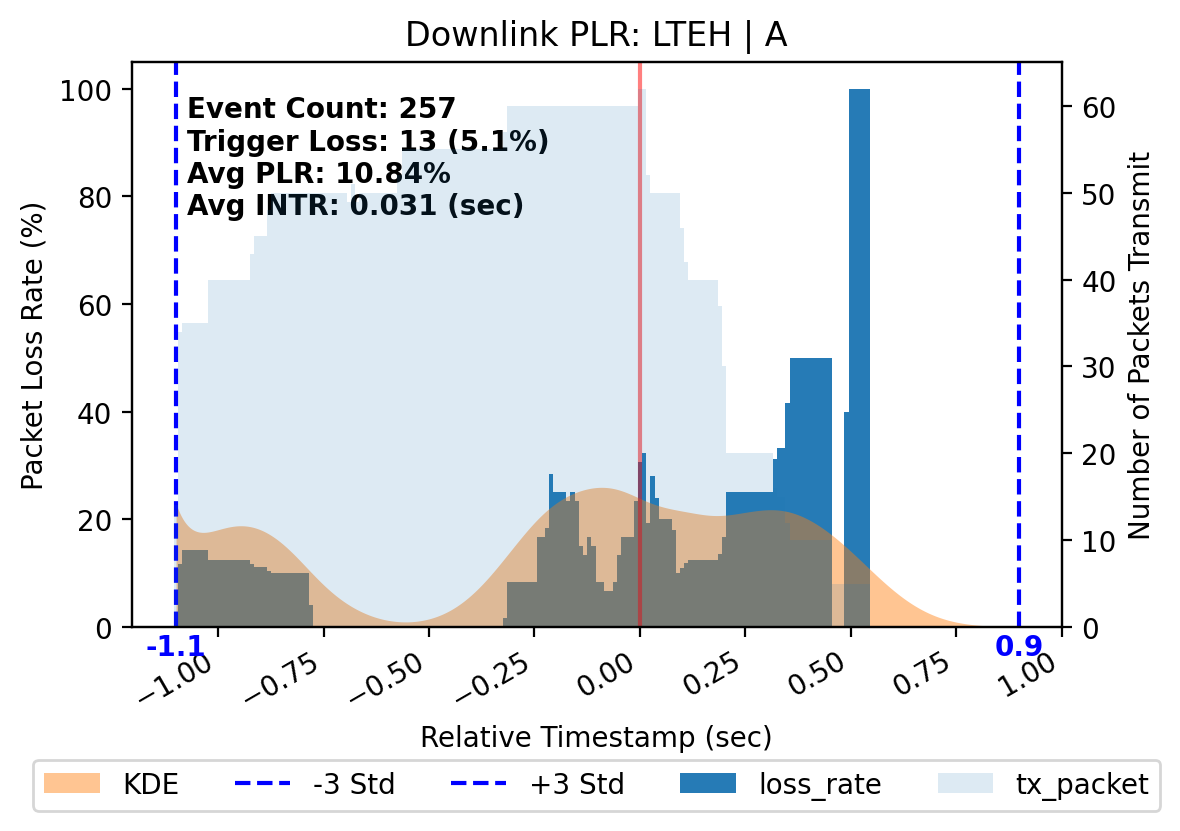

./20240407_13370041ed_test/dl_lost/models/plot/A_ENBH.png


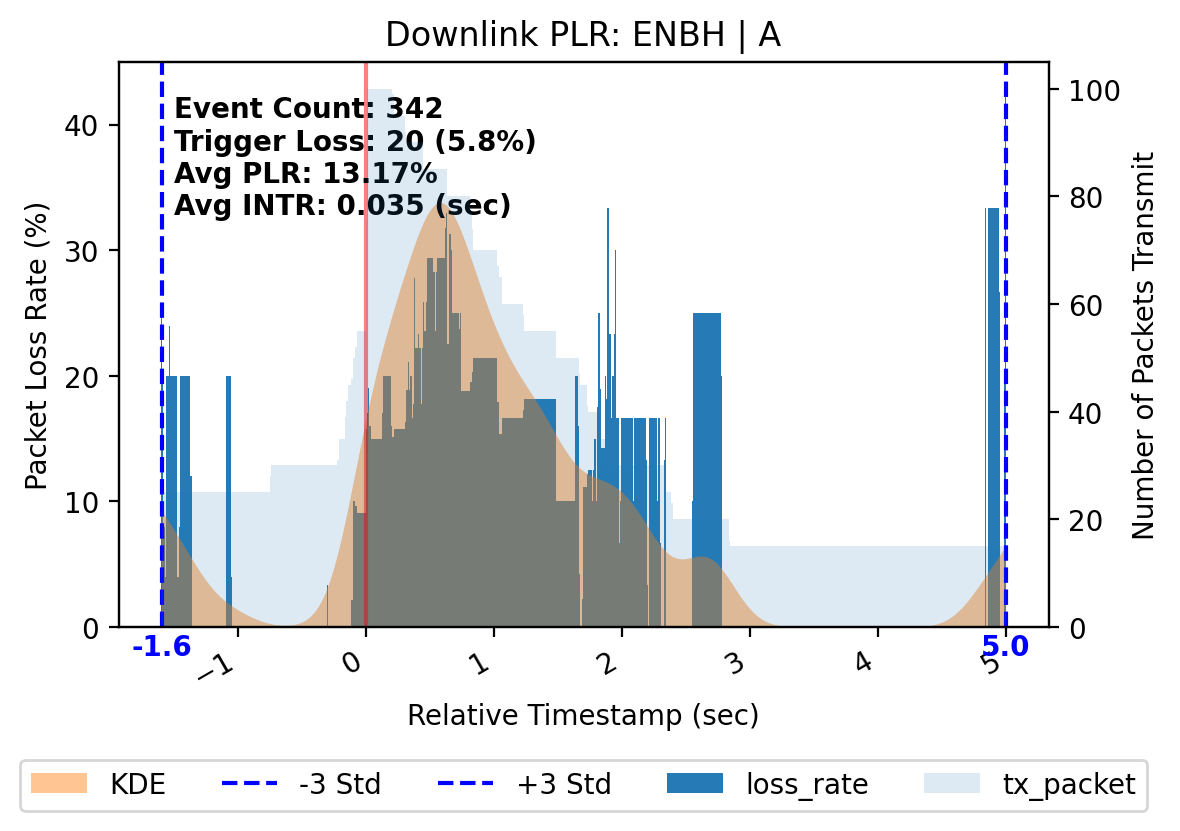

./20240407_13370041ed_test/dl_lost/models/plot/A_MCGH.png


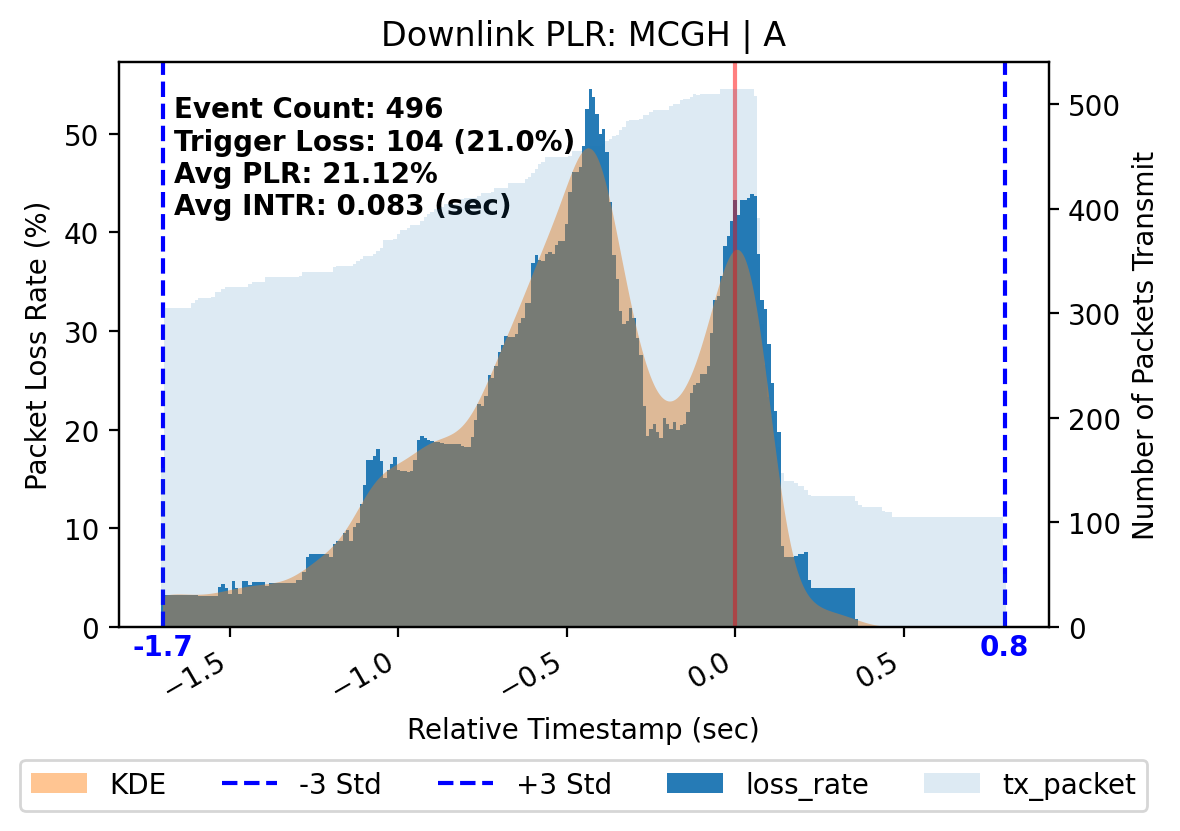

./20240407_13370041ed_test/dl_lost/models/plot/A_MNBH.png


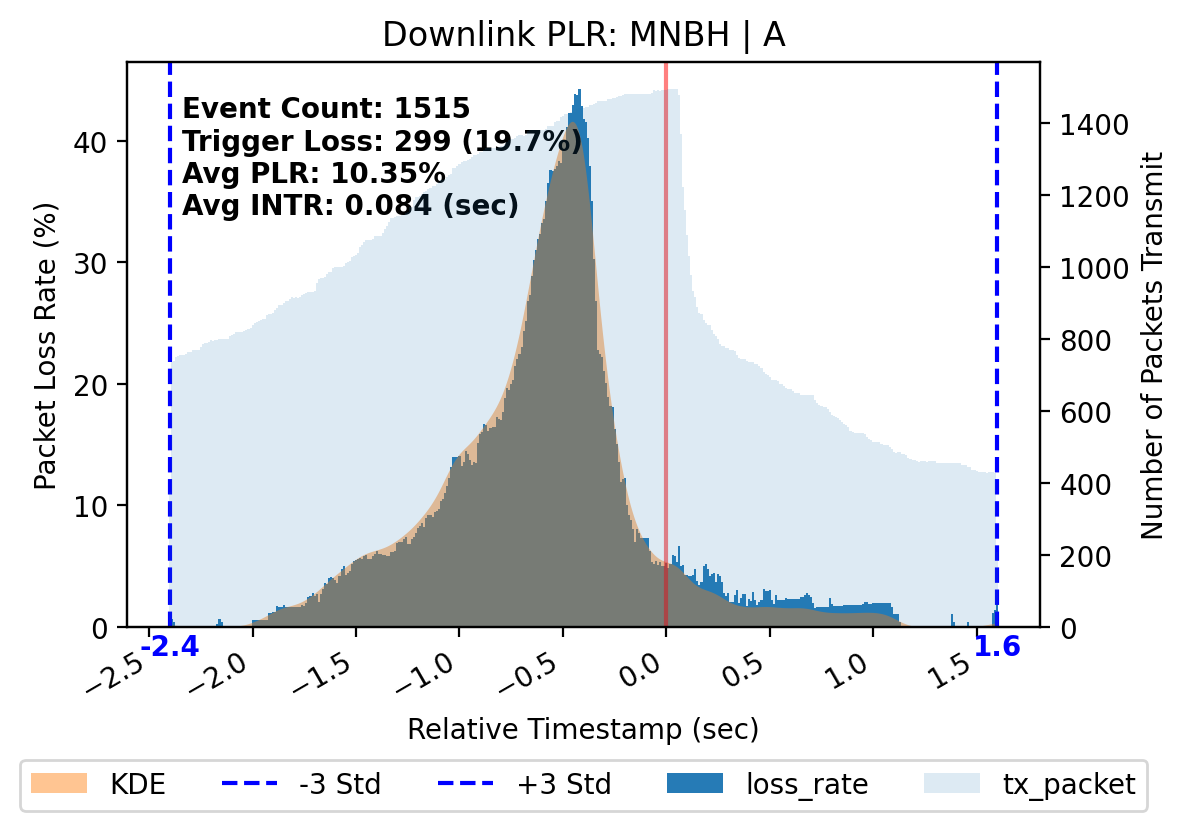

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGM.png


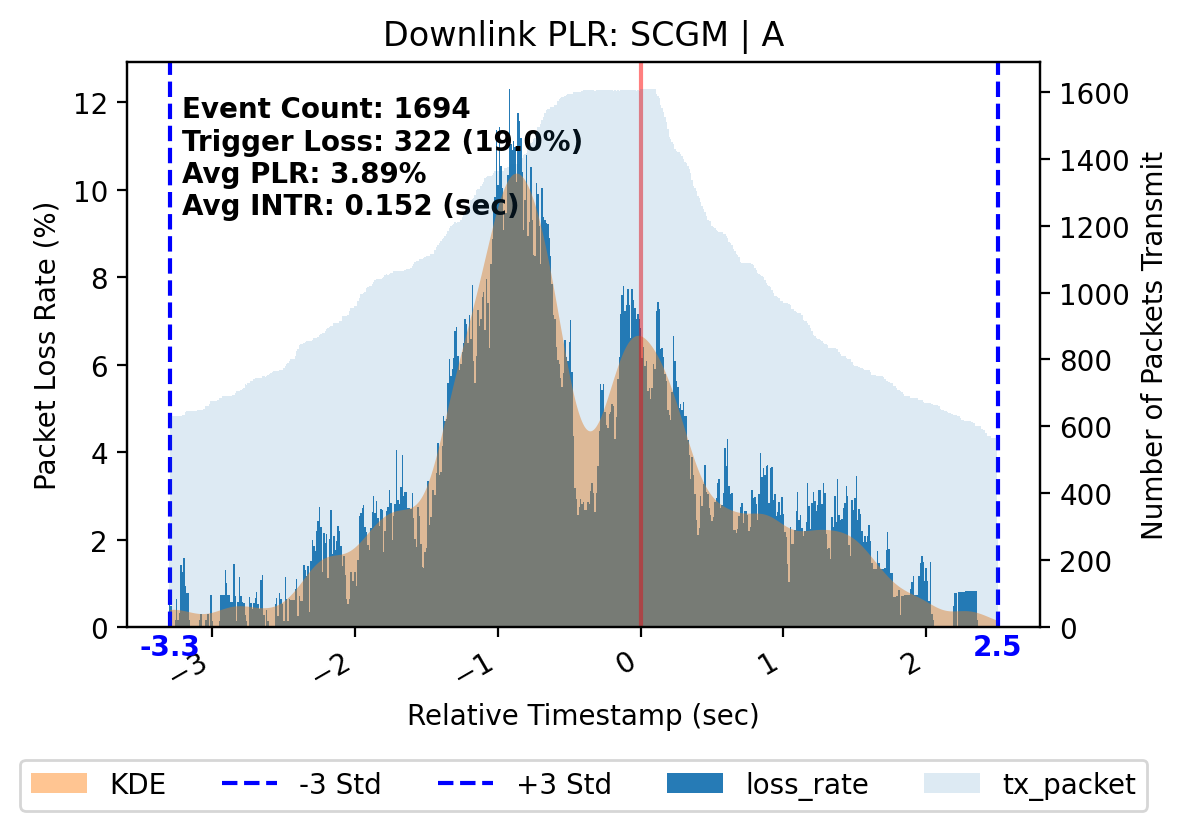

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGA.png


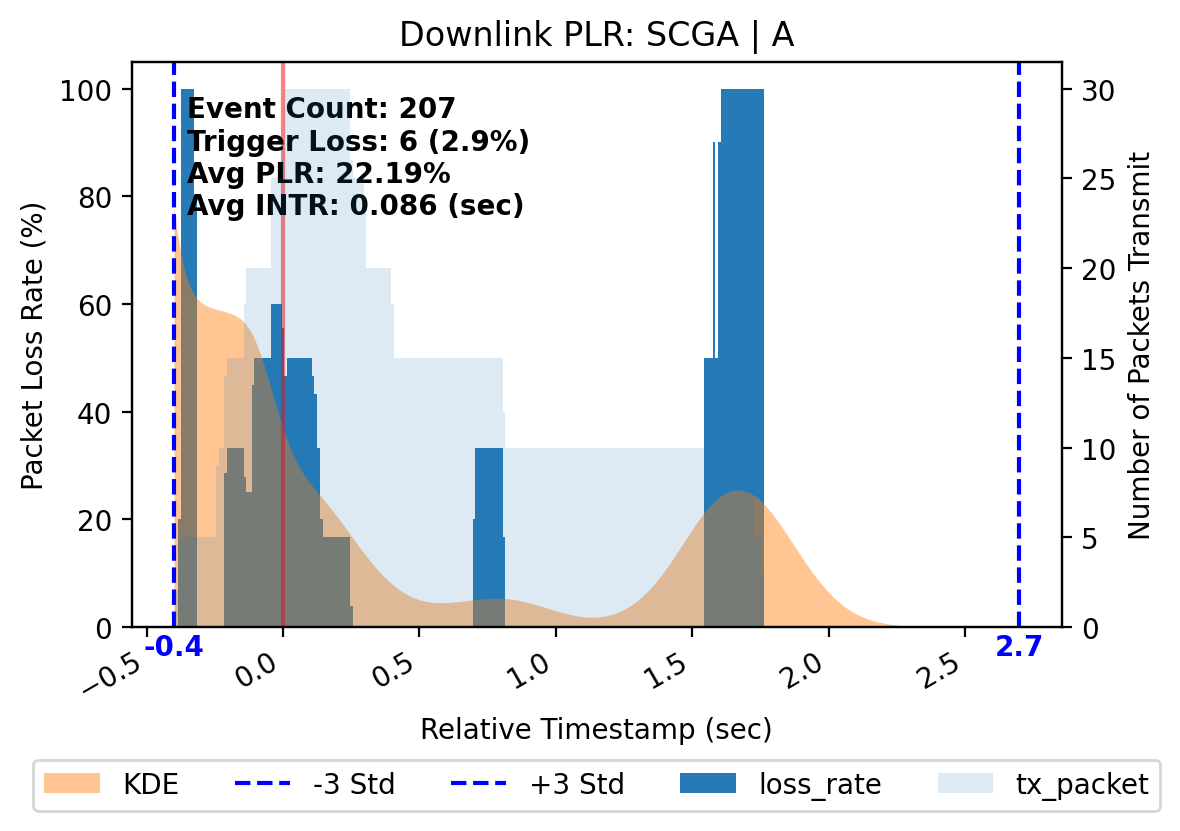

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGR-I.png


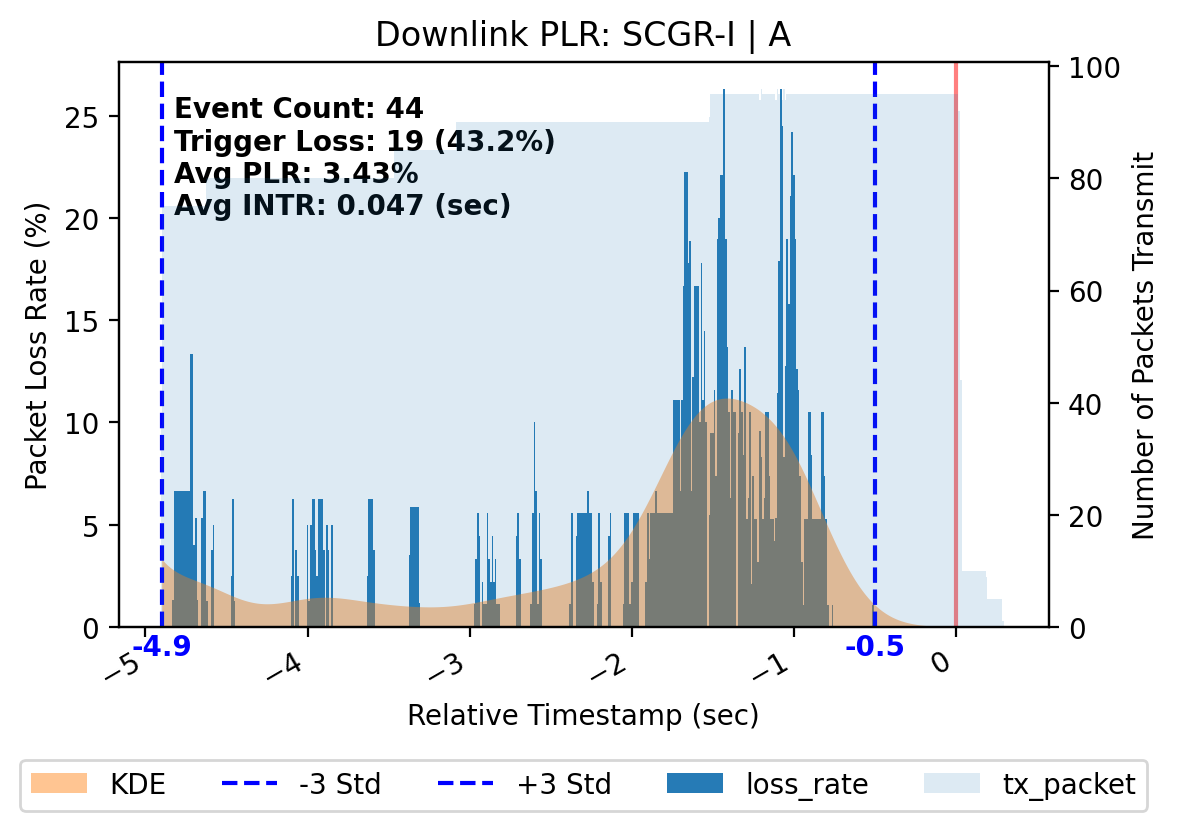

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGR-II.png


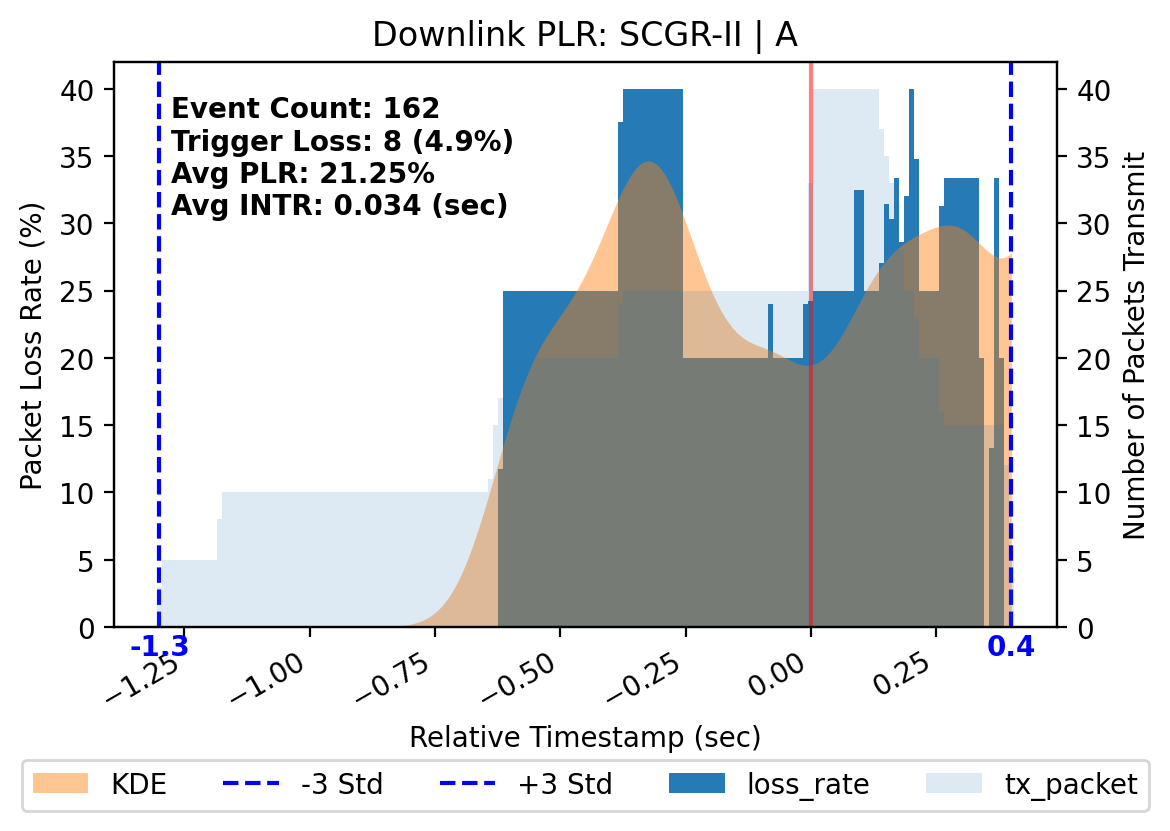

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGC-I.png


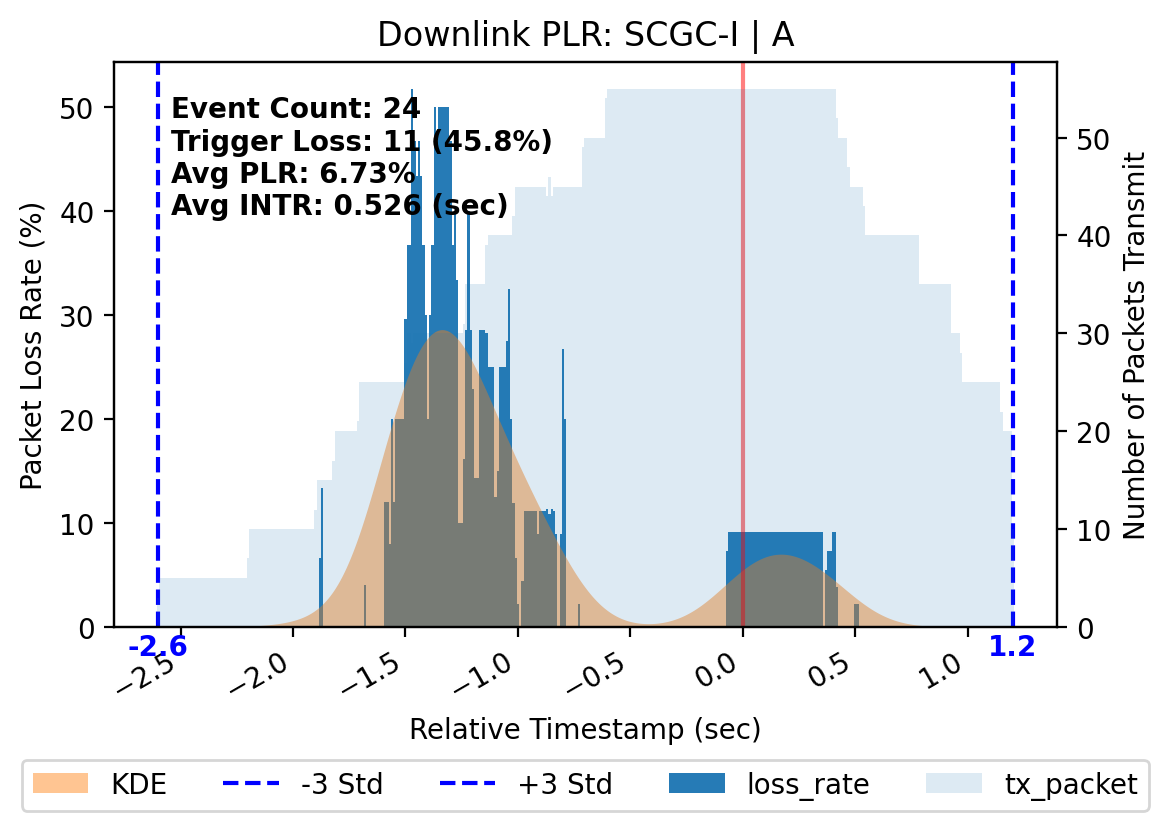

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGC-II.png


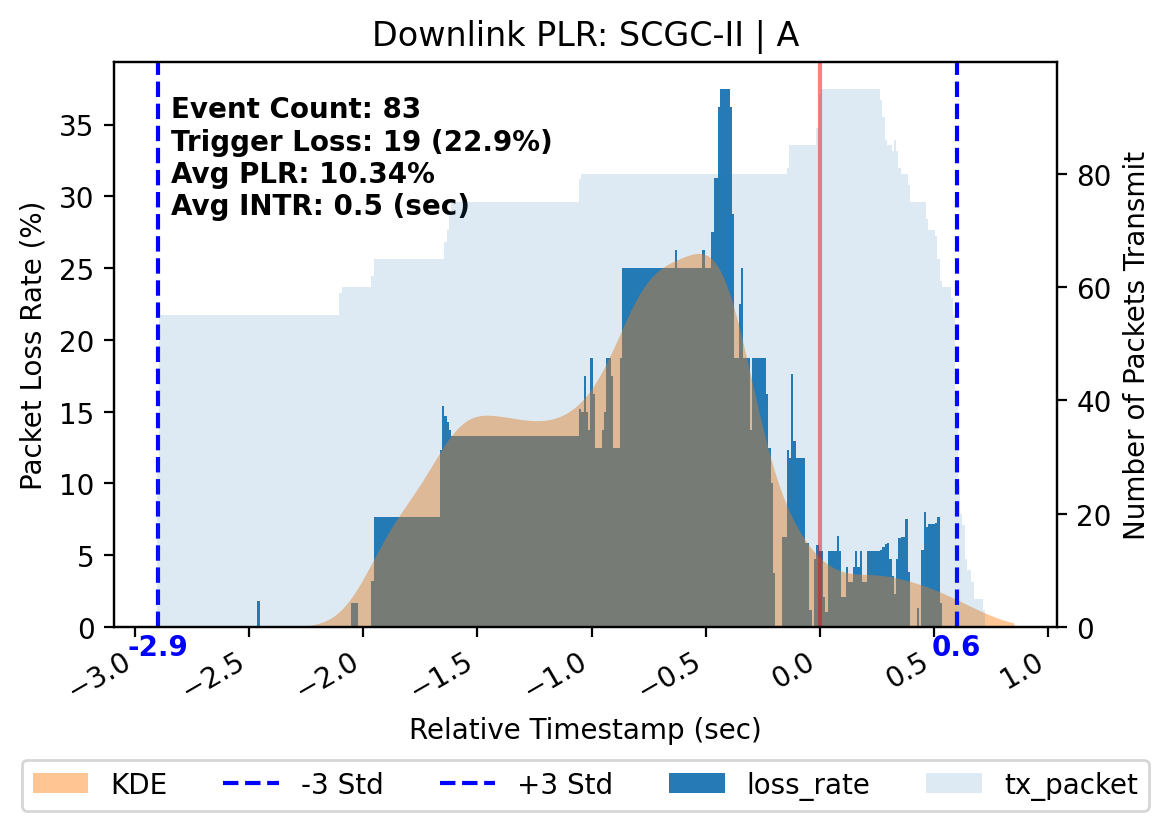

./20240407_13370041ed_test/dl_lost/models/plot/A_SCGF.png


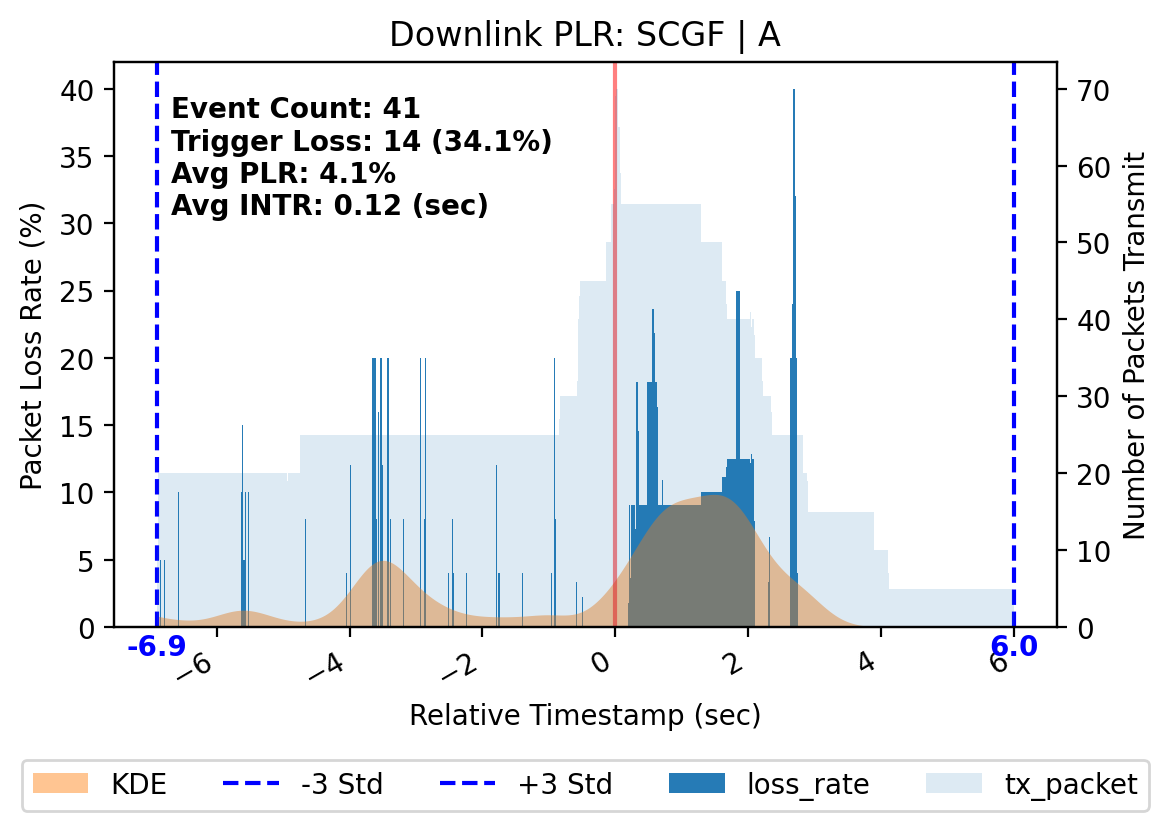

./20240407_13370041ed_test/dl_lost/models/plot/A_MCGF.png


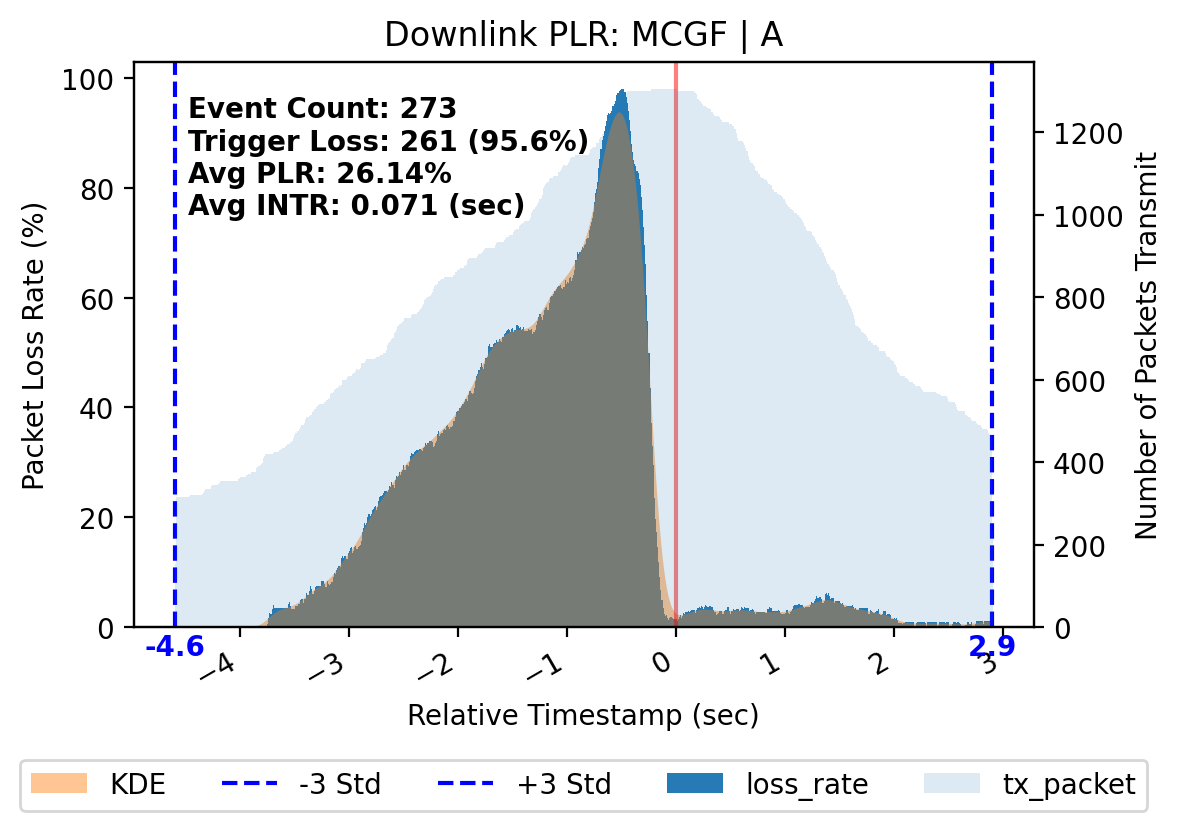

./20240407_13370041ed_test/dl_lost/models/plot/A_NASR.png


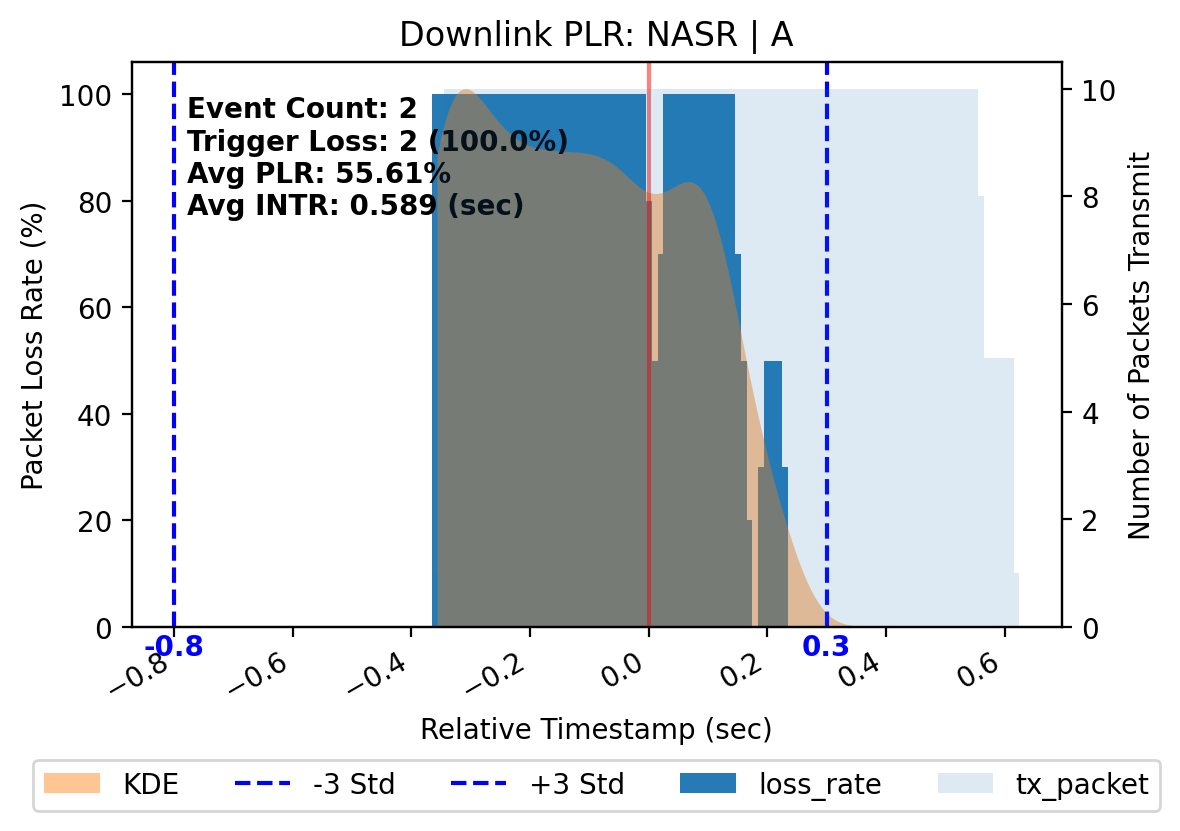

./20240407_13370041ed_test/dl_lost/models/plot/A_Stable.png


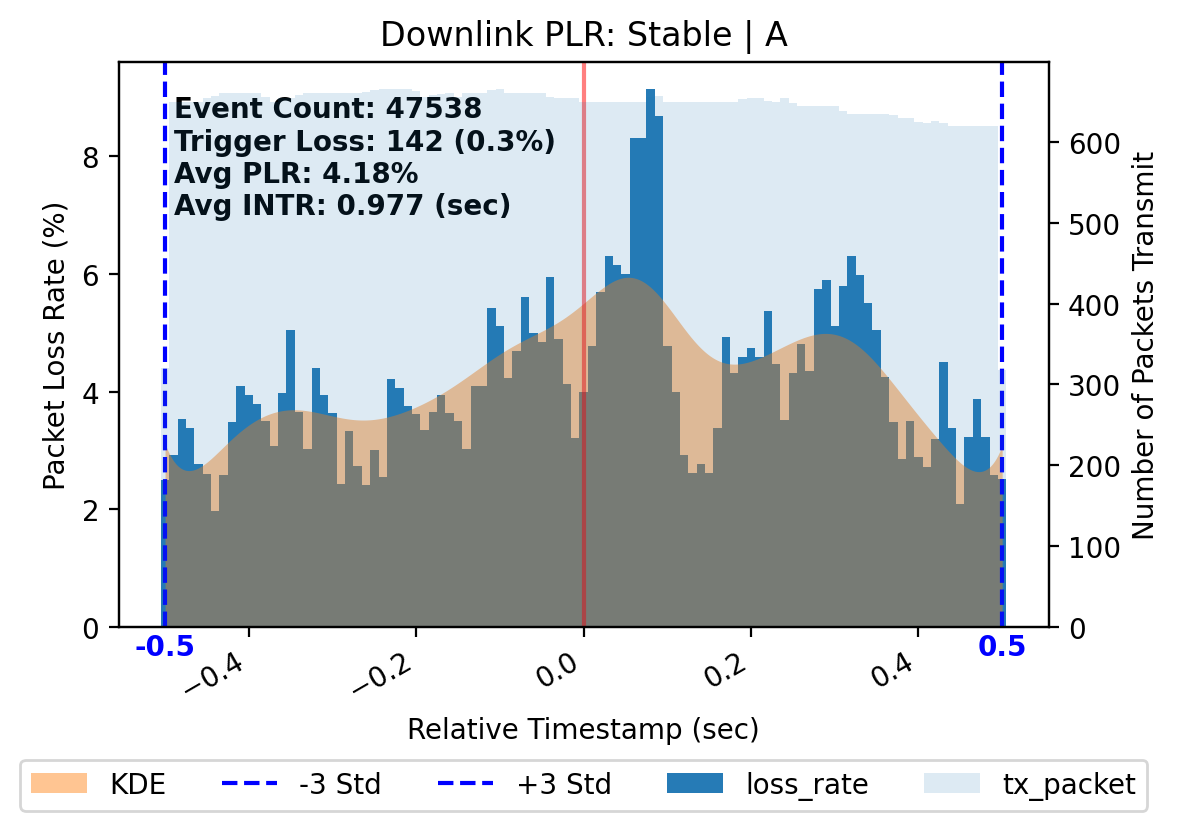

Save models: A -> ./20240407_13370041ed_test/dl_lost/models



In [47]:
model = Profile(filepaths, 'A', model_id, model_dscp, dirc_mets=dirc_mets, epochs=epochs, test_mode=test_mode)

# Single Radio Evaluation

# Enter Model ID

In [23]:
# model_name = '20240415_1604003926_test'
# model_id = model_name[:19] if len(model_name) > 19 else model_name
# model_dscp = model_name[20:] if len(model_name) > 19 else None

print('Model ID:', model_id, model_dscp)

Model ID: 20240417_1333003a88 new_data_sync_v2


# BR Eval

In [8]:
# Single Radio Example
# dates = data_loader(query_dates=True, show_info=True)

# selected_dates = [s for s in dates if s >= '2023-09-12']
selected_dates = ['2024-03-19']
# excluded_dates = []
# selected_exps = []
# excluded_exps = ['Modem_Action_Test', 'Control_Group', 'Control_Group2', 'Control_Group3']
selected_routes = ['BR']
# excluded_routes = []
filepaths = data_loader(mode='sr', selected_dates=selected_dates, selected_routes=selected_routes)

print(len(filepaths))
pprint(filepaths)

18
[['/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/handover_info_log.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_dnlk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_uplk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/diag_log_sm00_2024-03-19_18-39-12_rrc.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/diag_log_sm00_2024-03-19_18-39-12_ml1.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/diag_log_sm00_2024-03-19_18-39-12_nr_ml1.csv'],
 ['/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_uplk_loss_latency.csv',
  '/home

./20240415_1604003926_test/sr/dl_excl/models/BR
1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240415_1604003926_test/sr/dl_excl/BR_20240417_0912000_843fd/\home\wmnlab\F\database\2024-03-19\UDP_Bandlock_9S_Phone_BR\sm00\#01\data\udp_dnlk_loss_latency.csv
./20240415_1604003926_test/sr/dl_excl/results/BR_20240417_0912000_843fd.pkl
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240415_1604003926_test/sr/dl_excl/BR_20240417_0912000_843fd/\home\wmnlab\F\database\2024-03-19\UDP_Bandlock_9S_Phone_BR\sm01\#01\data\udp_dnlk_loss_latency.csv
./20240415_1604003926_test/sr/dl_excl/results/BR_20240417_0912000_843fd.pkl
./20240415_1604003926_test/sr/dl_excl/figures/BR_20240417_0912000_843fd.png


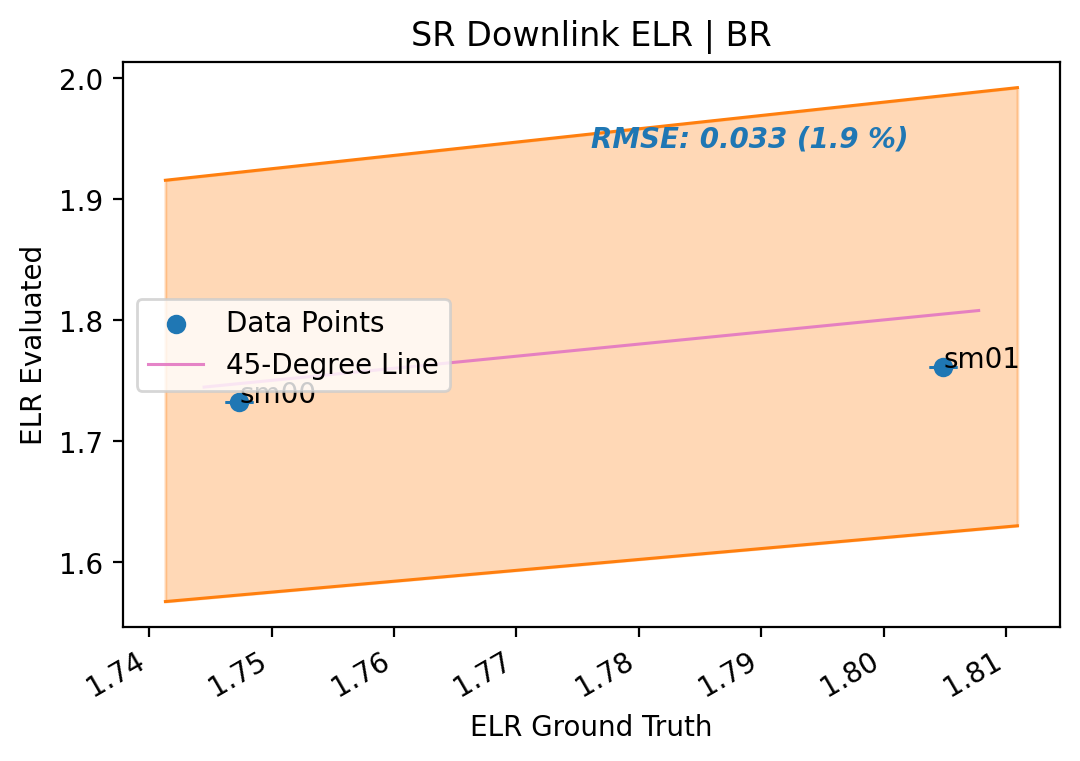

In [4]:
eval = Eval(filepaths, 'BR', model_id, model_dscp, dirc_mets=dirc_mets, save_answer=save_answer, test_mode=test_mode)
eval.run_hist_method(N=iter_num)
eval.plot()

./20240415_1604003926_test/sr/dl_lost/models/BR
1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm00/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240415_1604003926_test/sr/dl_lost/BR_20240417_0912001_9fd58/\home\wmnlab\F\database\2024-03-19\UDP_Bandlock_9S_Phone_BR\sm00\#01\data\udp_dnlk_loss_latency.csv
./20240415_1604003926_test/sr/dl_lost/results/BR_20240417_0912001_9fd58.pkl
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv
2/18 /home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240415_1604003926_test/sr/dl_lost/BR_20240417_0912001_9fd58/\home\wmnlab\F\database\2024-03-19\UDP_Bandlock_9S_Phone_BR\sm01\#01\data\udp_dnlk_loss_latency.csv
./20240415_1604003926_test/sr/dl_lost/results/BR_20240417_0912001_9fd58.pkl
./20240415_1604003926_test/sr/dl_lost/figures/BR_20240417_0912001_9fd58.png


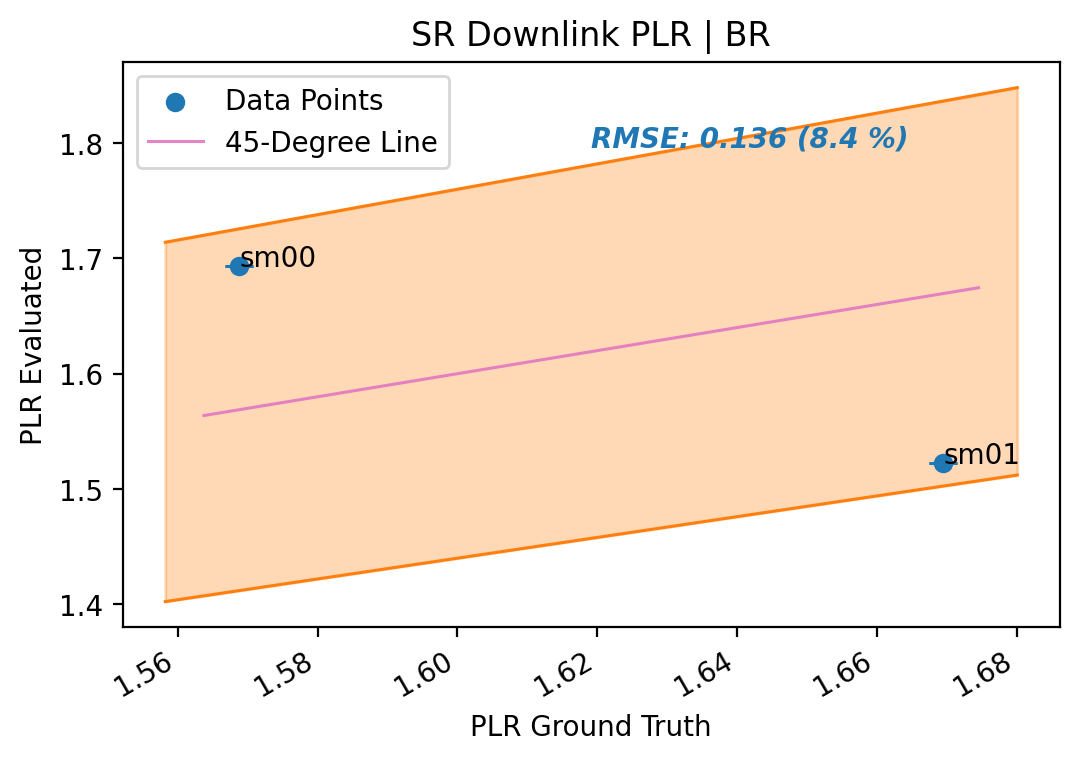

In [5]:
eval = Eval(filepaths, 'BR', model_id, model_dscp, dirc_mets='dl_lost', save_answer=True)
eval.run_hist_method(N=1)
eval.plot()

# A Eval

In [ ]:
# Single Radio Example
# dates = data_loader(query_dates=True)

# selected_dates = [s for s in dates if s >= '2023-09-12']
selected_dates = ['2024-03-20']
# excluded_dates = []
# selected_exps = []
# excluded_exps = ['Modem_Action_Test', 'Control_Group', 'Control_Group2', 'Control_Group3']
selected_routes = ['A']
# excluded_routes = []
filepaths = data_loader(mode='sr', selected_dates=selected_dates, selected_routes=selected_routes)

print(len(filepaths))
# pprint(filepaths)

18


./20240403_01430006f4_test/dl_lost/models/A
1/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
1/18 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240403_01430006f4_test/sr_results/dl_lost/A_20240403_0155001_8fbe7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency.csv
./20240403_01430006f4_test/dl_lost/results/A_20240403_0155001_8fbe7.pkl
./20240403_01430006f4_test/dl_lost/figures/A_20240403_0155001_8fbe7.png


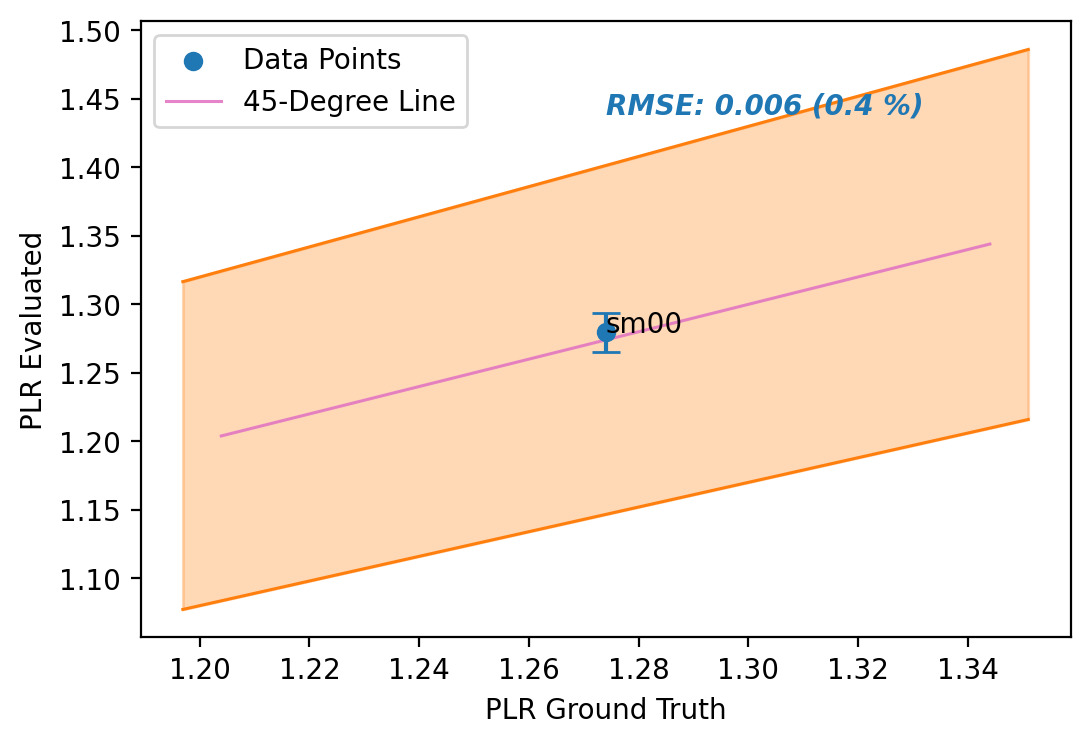

In [ ]:
eval = Eval(filepaths, 'A', model_id, model_dscp, dirc_mets=dirc_mets, save_answer=save_answer, test_mode=test_mode)
eval.run_hist_method(N=iter_num)
eval.plot()